# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
import warnings
import os
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClusterMixin

# Loading Dataset

In [3]:
df = pd.read_csv('data/Dataset_3.csv')

# Data Preprosessing

In [4]:
print("Dataset Shape: ", df.shape,"\n")
print("Dataset First 5 rows:\n", df.head(5),"\n")
print("Dataset Last 5 rows:\n", df.tail(5),"\n")
print("Columns in Dataset:\n", df.columns,"\n")
print("Dataset Info:\n", str(df.info()),"\n")

Dataset Shape:  (200, 5) 

Dataset First 5 rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

Dataset Last 5 rows:
      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83 

Columns in Dataset:
 Index(['CustomerID', 'Gender', 'Age', '

In [5]:
print("Missing values:\n",df.isnull().sum(),"\n")
print("Duplicate rows:",df.duplicated().sum(),"\n")
print("Data Types:\n", df.dtypes,"\n")
print("Dataset Description:\n", str(df.describe()),"\n")

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 

Duplicate rows: 0 

Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object 

Dataset Description:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000


In [6]:
encoded = LabelEncoder()
df['Gender Enc'] = encoded.fit_transform(df['Gender']) #Male = 1, Female = 0

In [7]:
df.rename(columns={
    'Annual Income (k$)': 'Annual Income', 
    'Spending Score (1-100)': 'Spending Score'}, 
inplace=True)

In [8]:
df_cleaned = df.copy()
print("Columns in Dataset:\n", df_cleaned.columns,"\n")
df_cleaned.drop(['Gender','CustomerID'], axis=1, inplace=True)
print("Columns in Dataset After Dropping:\n", df_cleaned.columns,"\n")

Columns in Dataset:
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score',
       'Gender Enc'],
      dtype='object') 

Columns in Dataset After Dropping:
 Index(['Age', 'Annual Income', 'Spending Score', 'Gender Enc'], dtype='object') 



In [9]:
print("Cleaned Dataset Shape: ", df_cleaned.shape,"\n")

Cleaned Dataset Shape:  (200, 4) 



# Exploratary Data Analysis

In [10]:
df_cleaned.dtypes

Age               int64
Annual Income     int64
Spending Score    int64
Gender Enc        int64
dtype: object

In [11]:
print("\nGender Distribution:")
print(df_cleaned['Gender Enc'].value_counts())
print(f"Gender ratio - Female: {(df_cleaned['Gender Enc']==0).sum()/len(df_cleaned)*100:.1f}%, Male: {(df_cleaned['Gender Enc']==1).sum()/len(df_cleaned)*100:.1f}%")

#0 - Female
#1 - Male


Gender Distribution:
Gender Enc
0    112
1     88
Name: count, dtype: int64
Gender ratio - Female: 56.0%, Male: 44.0%


In [12]:
print("\nAge Statistics:")
print(df_cleaned['Age'].describe())


Age Statistics:
count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


In [13]:
print("\nAnnual Income Statistics:")
print(df_cleaned['Annual Income'].describe())


Annual Income Statistics:
count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income, dtype: float64


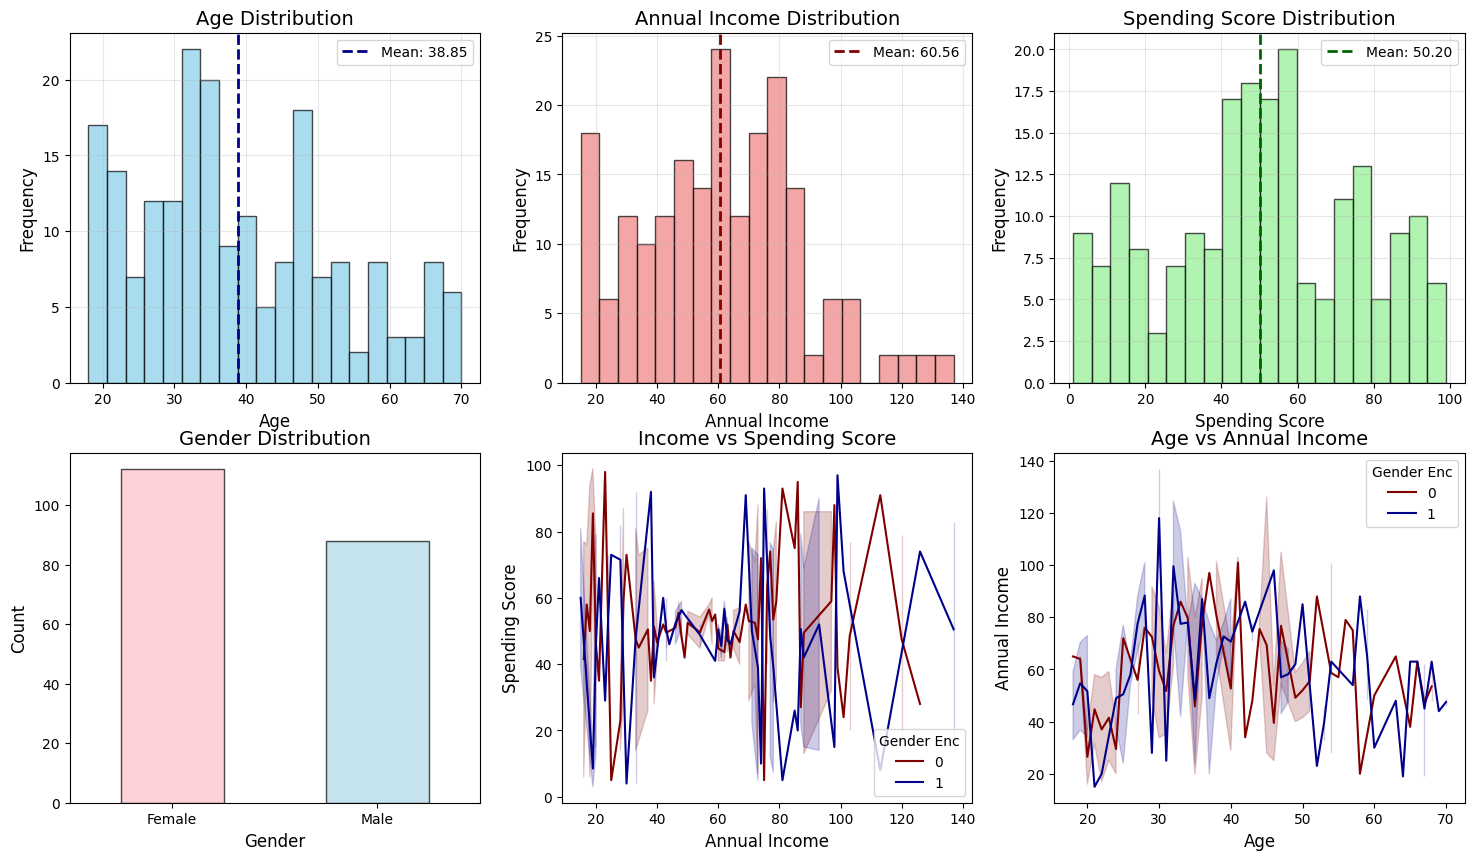

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].hist(df_cleaned['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
mean_age = df_cleaned['Age'].mean()
axes[0, 0].axvline(mean_age, color='darkblue', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[0, 0].set_title('Age Distribution', fontsize=14)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)


axes[0, 1].hist(df_cleaned['Annual Income'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
mean_income = df_cleaned['Annual Income'].mean()
axes[0, 1].axvline(mean_income, color='maroon', linestyle='--', linewidth=2, label=f'Mean: {mean_income:.2f}')
axes[0, 1].set_title('Annual Income Distribution', fontsize=14)
axes[0, 1].set_xlabel('Annual Income', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].hist(df_cleaned['Spending Score'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
mean_spending = df_cleaned['Spending Score'].mean()
axes[0, 2].axvline(mean_spending, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_spending:.2f}')
axes[0, 2].set_title('Spending Score Distribution', fontsize=14)
axes[0, 2].set_xlabel('Spending Score', fontsize=12)
axes[0, 2].set_ylabel('Frequency', fontsize=12)
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)


df_cleaned['Gender Enc'].value_counts().plot(kind='bar', ax=axes[1, 0], color=['pink', 'lightblue'], edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Gender Distribution', fontsize=14)
axes[1, 0].set_xlabel('Gender', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_xticklabels(['Female', 'Male'], rotation=0)


sns.lineplot(data=df_cleaned, x='Annual Income', y='Spending Score', hue='Gender Enc', ax=axes[1, 1],palette={0: 'maroon', 1: 'darkblue'})
axes[1, 1].set_title('Income vs Spending Score', fontsize=14)
axes[1, 1].set_xlabel('Annual Income', fontsize=12)
axes[1, 1].set_ylabel('Spending Score', fontsize=12)


sns.lineplot(data=df_cleaned, x='Age', y='Annual Income', hue='Gender Enc', ax=axes[1, 2],palette={0: 'maroon', 1: 'darkblue'})
axes[1, 2].set_title('Age vs Annual Income', fontsize=14)
axes[1, 2].set_xlabel('Age', fontsize=12)
axes[1, 2].set_ylabel('Annual Income', fontsize=12)
plt.show()


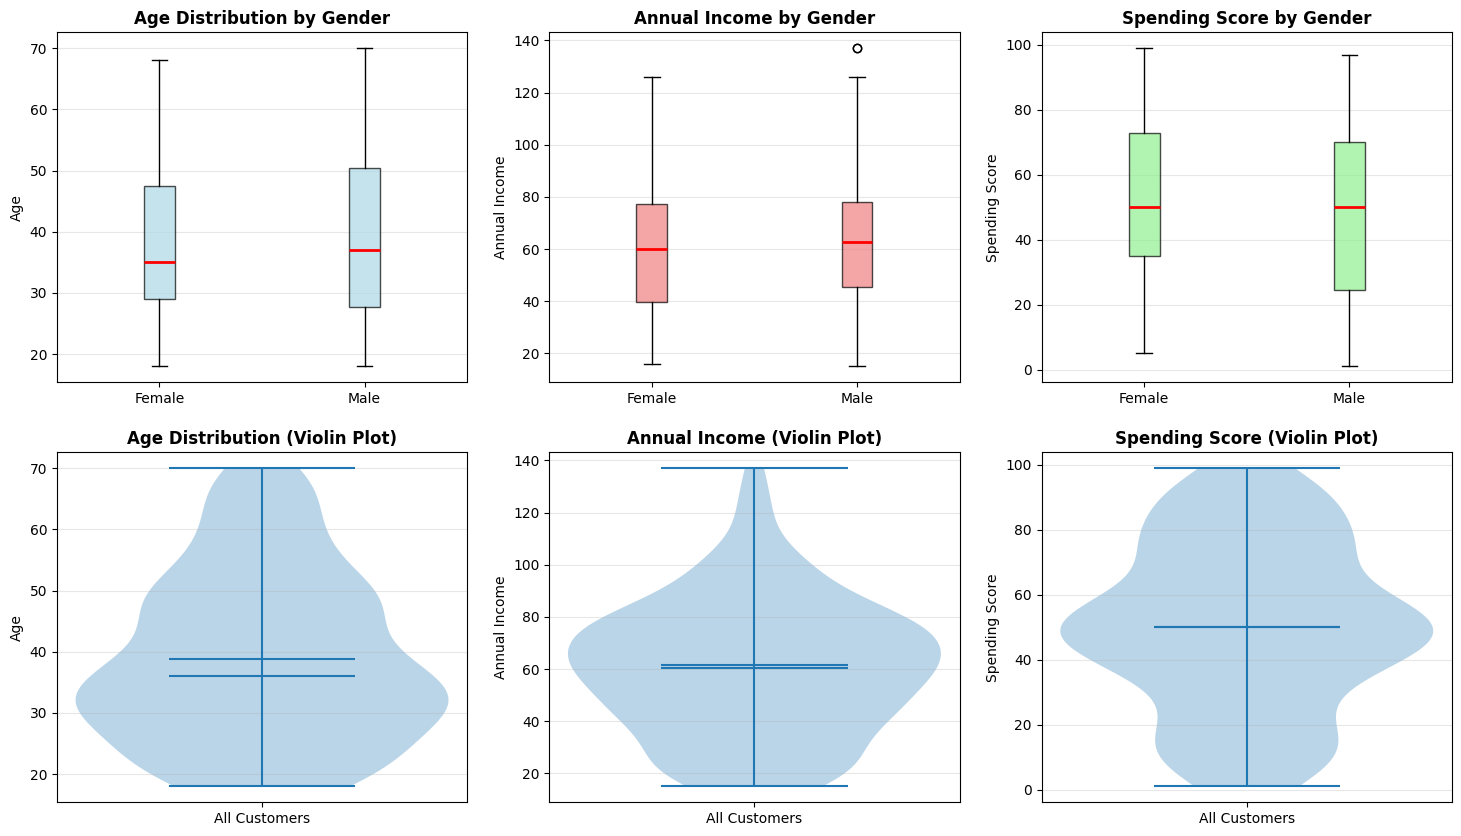

In [15]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].boxplot([df_cleaned[df_cleaned['Gender Enc']==0]['Age'], df_cleaned[df_cleaned['Gender Enc']==1]['Age']], 
                    labels=['Female', 'Male'], patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[0, 0].set_title('Age Distribution by Gender', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Age')
axes[0, 0].grid(True, alpha=0.3, axis='y')


axes[0, 1].boxplot([df_cleaned[df_cleaned['Gender Enc']==0]['Annual Income'], 
                    df_cleaned[df_cleaned['Gender Enc']==1]['Annual Income']], 
                    labels=['Female', 'Male'], patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_title('Annual Income by Gender', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Annual Income')
axes[0, 1].grid(True, alpha=0.3, axis='y')


axes[0, 2].boxplot([df_cleaned[df_cleaned['Gender Enc']==0]['Spending Score'], 
                    df_cleaned[df_cleaned['Gender Enc']==1]['Spending Score']], 
                    labels=['Female', 'Male'], patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[0, 2].set_title('Spending Score by Gender', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Spending Score')
axes[0, 2].grid(True, alpha=0.3, axis='y')


parts = axes[1, 0].violinplot([df_cleaned['Age']], positions=[1], showmeans=True, showmedians=True)
axes[1, 0].set_title('Age Distribution (Violin Plot)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Age')
axes[1, 0].set_xticks([1])
axes[1, 0].set_xticklabels(['All Customers'])
axes[1, 0].grid(True, alpha=0.3, axis='y')


parts = axes[1, 1].violinplot([df_cleaned['Annual Income']], positions=[1], showmeans=True, showmedians=True)
axes[1, 1].set_title('Annual Income (Violin Plot)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Annual Income')
axes[1, 1].set_xticks([1])
axes[1, 1].set_xticklabels(['All Customers'])
axes[1, 1].grid(True, alpha=0.3, axis='y')


parts = axes[1, 2].violinplot([df_cleaned['Spending Score']], positions=[1], showmeans=True, showmedians=True)
axes[1, 2].set_title('Spending Score (Violin Plot)', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Spending Score')
axes[1, 2].set_xticks([1])
axes[1, 2].set_xticklabels(['All Customers'])
axes[1, 2].grid(True, alpha=0.3, axis='y')
plt.show()

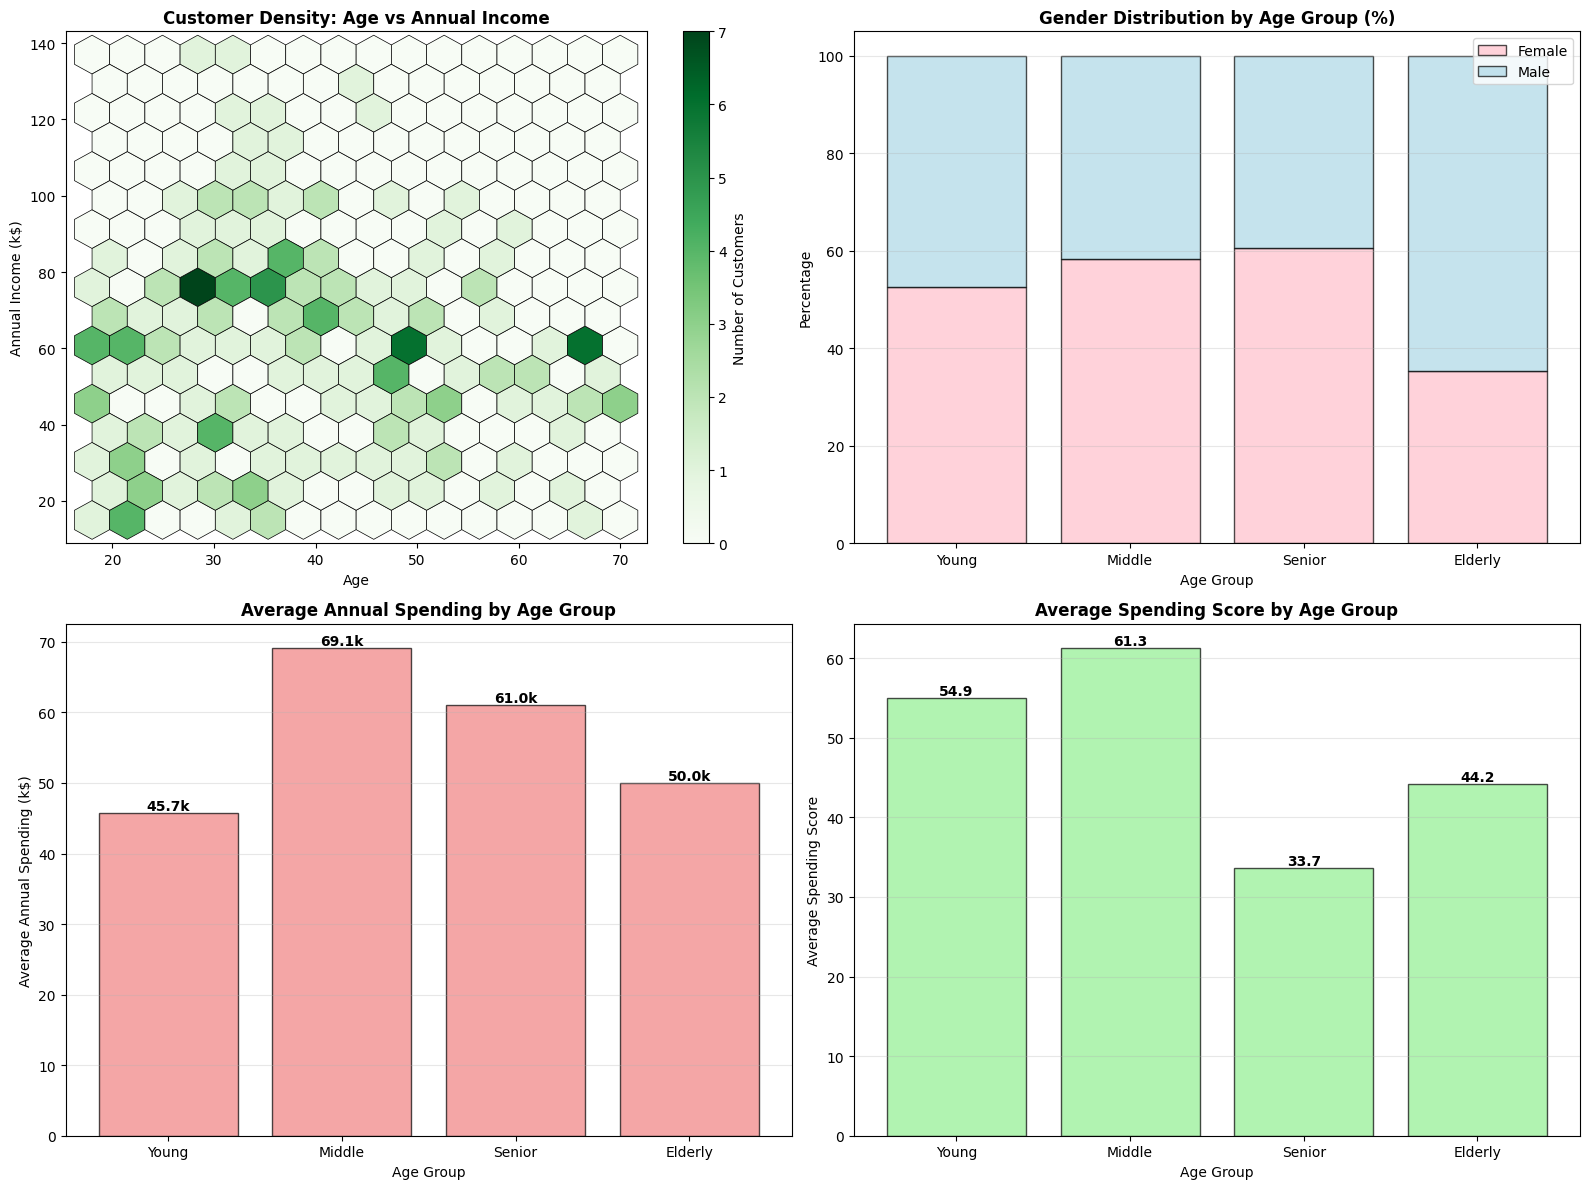

In [16]:
df_temp = df_cleaned.copy()

df_temp['Age_Group'] = pd.cut(df_temp['Age'], bins=[0,25,40,60,100], 
                              labels=['Young','Middle','Senior','Elderly'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))


hexbin = axes[0, 0].hexbin(df_temp['Age'], df_temp['Annual Income'], 
                           gridsize=15, cmap='Greens', edgecolors='black', linewidths=0.5)
axes[0, 0].set_title('Customer Density: Age vs Annual Income', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Annual Income (k$)')
plt.colorbar(hexbin, ax=axes[0, 0], label='Number of Customers')


gender_age = df_temp.groupby(['Age_Group','Gender Enc']).size().unstack(fill_value=0)
gender_age_pct = gender_age.div(gender_age.sum(axis=1), axis=0) * 100
x = range(len(gender_age_pct))
axes[0, 1].bar(x, gender_age_pct[0], label='Female', color='pink', edgecolor='black', alpha=0.7)
axes[0, 1].bar(x, gender_age_pct[1], bottom=gender_age_pct[0], 
               label='Male', color='lightblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(gender_age_pct.index, rotation=0)
axes[0, 1].set_title('Gender Distribution by Age Group (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')


avg_spending = df_temp.groupby('Age_Group')['Annual Income'].mean().sort_index()
bars = axes[1, 0].bar(range(len(avg_spending)), avg_spending.values, 
                      color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xticks(range(len(avg_spending)))
axes[1, 0].set_xticklabels(avg_spending.index, rotation=0)
axes[1, 0].set_title('Average Annual Spending by Age Group', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Average Annual Spending (k$)')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}k', ha='center', va='bottom', fontweight='bold')


avg_income = df_temp.groupby('Age_Group')['Spending Score'].mean().sort_index()
bars = axes[1, 1].bar(range(len(avg_income)), avg_income.values, 
                      color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].set_xticks(range(len(avg_income)))
axes[1, 1].set_xticklabels(avg_income.index, rotation=0)
axes[1, 1].set_title('Average Spending Score by Age Group', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Average Spending Score')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [17]:
correlation_df = df_cleaned[['Age', 'Annual Income', 'Spending Score', 'Gender Enc']]
correlation_df.columns = ['Age', 'Annual Income', 'Spending Score', 'Gender Enc']
print("\nCorrelation Matrix:")
print(correlation_df.corr())



Correlation Matrix:
                     Age  Annual Income  Spending Score  Gender Enc
Age             1.000000      -0.012398       -0.327227    0.060867
Annual Income  -0.012398       1.000000        0.009903    0.056410
Spending Score -0.327227       0.009903        1.000000   -0.058109
Gender Enc      0.060867       0.056410       -0.058109    1.000000


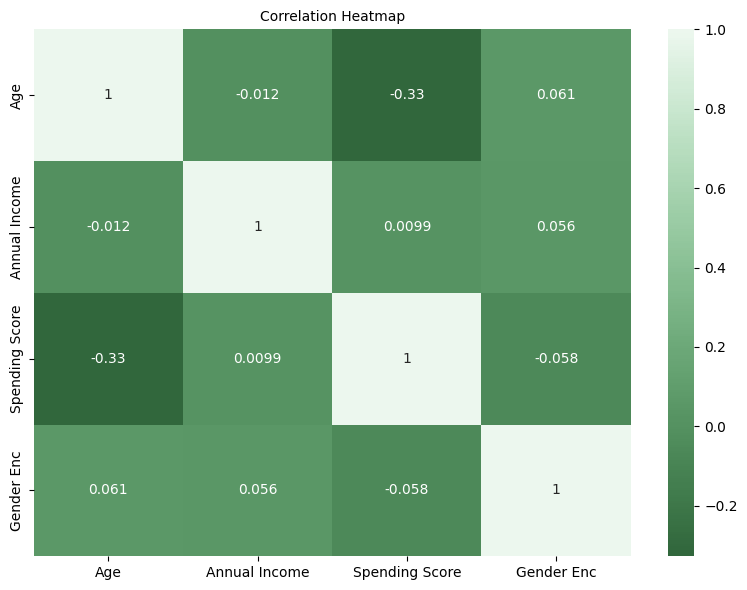

In [18]:
plt.figure(figsize=(8, 6))
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.heatmap(correlation_df.corr(), annot=True,cmap=cmap, center=0)
plt.title('Correlation Heatmap', fontsize=10)
plt.tight_layout()
plt.show()

# Feature Engineering

In [19]:
df_cleaned['Spending Per Income'] = df_cleaned['Annual Income']/(df_cleaned['Spending Score'] + 1)
df_cleaned['Age Group']=pd.cut(df_cleaned['Age'], bins = [0,25,40,60,100], labels = ['Young','Middle','Senior','Elderly'])
df_cleaned['Spending Ratio'] = df_cleaned['Spending Score'] / df_cleaned['Annual Income']
encoded_age_group = LabelEncoder()
df_cleaned['Age Group Enc'] = encoded_age_group.fit_transform(df_cleaned['Age Group'])
df_cleaned.drop(['Age Group'], axis=1, inplace=True)
df_cleaned.dtypes

Age                      int64
Annual Income            int64
Spending Score           int64
Gender Enc               int64
Spending Per Income    float64
Spending Ratio         float64
Age Group Enc            int64
dtype: object

# Splitting Data

In [20]:
features_for_clustering = [
    'Age', 
    'Annual Income', 
    'Spending Score', 
    'Spending Per Income'
]

X = df_cleaned[features_for_clustering].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (160, 4)
Testing set size: (40, 4)


# Chosing a Training Model

In [21]:
models = {
    'KMeans': KMeans(n_clusters=5, random_state=42),  # default clusters
    'Agglomerative': AgglomerativeClustering(n_clusters=5),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=5, random_state=42)
}

model_scores = {}

for name, model in models.items():
    if name == 'GMM':
        labels = model.fit_predict(X_scaled)
    else:
        labels = model.fit_predict(X_scaled)
    
    sil_score = silhouette_score(X_scaled, labels) if len(np.unique(labels)) > 1 else np.nan
    db_score = davies_bouldin_score(X_scaled, labels) if len(np.unique(labels)) > 1 else np.nan
    ch_score = calinski_harabasz_score(X_scaled, labels) if len(np.unique(labels)) > 1 else np.nan
    
    model_scores[name] = {
        'Silhouette': sil_score,
        'Davies-Bouldin': db_score,
        'Calinski-Harabasz': ch_score
    }

scores_df = pd.DataFrame(model_scores).T
print("Model Evaluation Scores:\n", scores_df)

Model Evaluation Scores:
                Silhouette  Davies-Bouldin  Calinski-Harabasz
KMeans           0.411149        0.769961         123.954116
Agglomerative    0.389784        0.812929         112.660170
DBSCAN           0.241724        1.426659          33.642808
GMM              0.315797        1.047890          76.519870


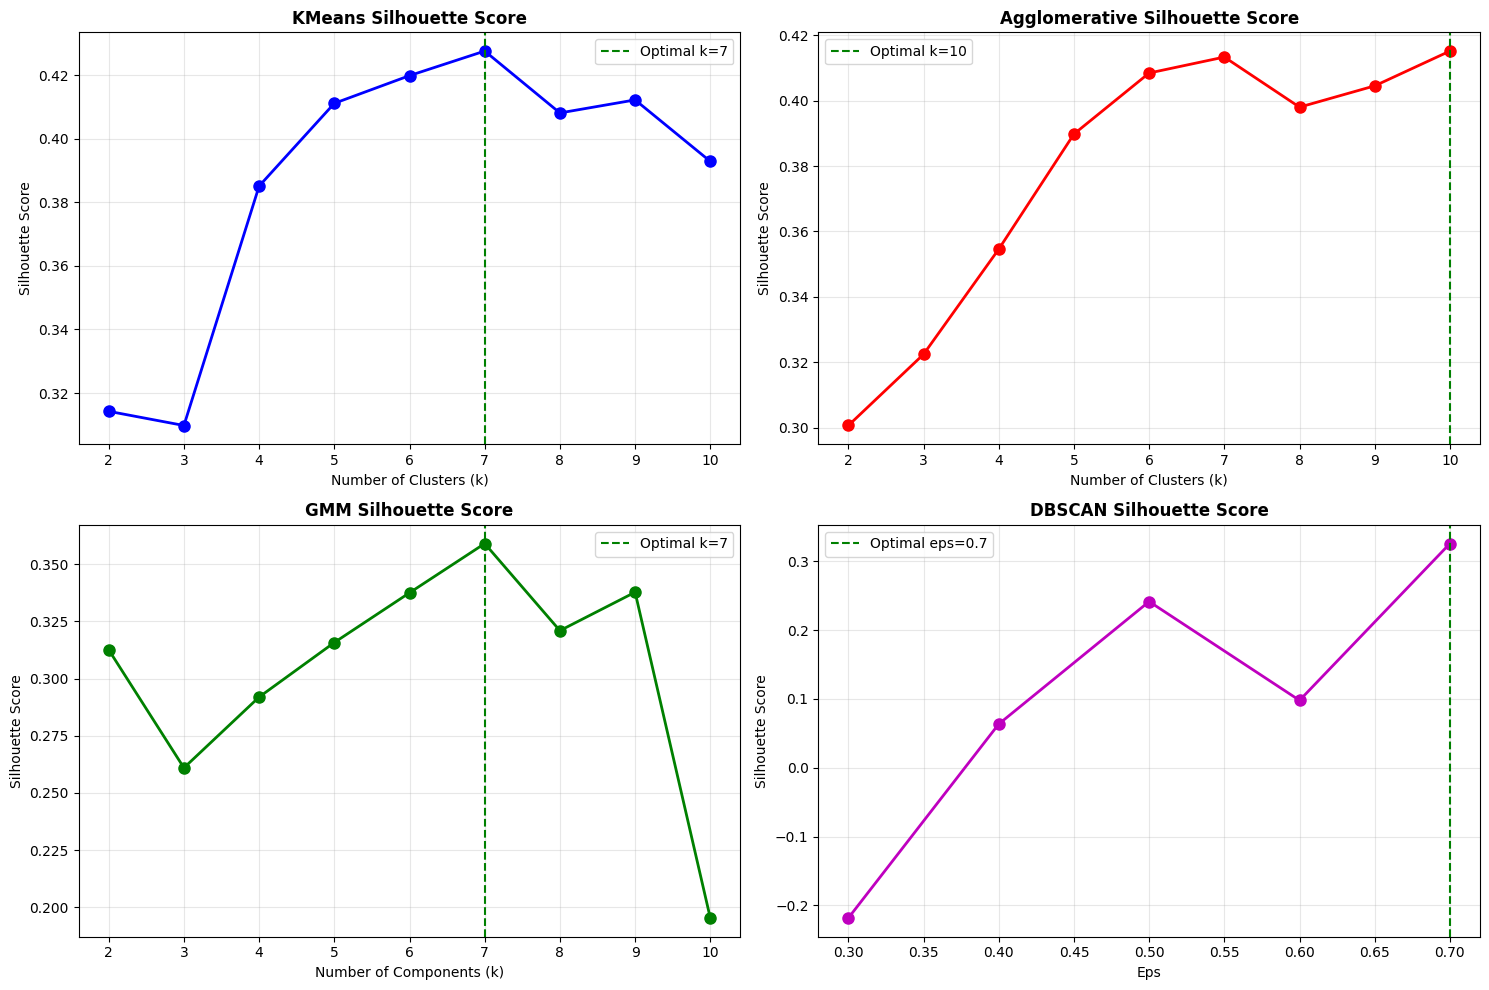

In [22]:
K_range = range(2, 11)
eps_range = [0.3, 0.4, 0.5, 0.6, 0.7]

scores_dict = {
    'KMeans': [],
    'Agglomerative': [],
    'GMM': [],
    'DBSCAN': []
}

for k in K_range:
    
    km = KMeans(n_clusters=k, random_state=42)
    labels_km = km.fit_predict(X_scaled)
    scores_dict['KMeans'].append(silhouette_score(X_scaled, labels_km))
    
    agg = AgglomerativeClustering(n_clusters=k)
    labels_agg = agg.fit_predict(X_scaled)
    scores_dict['Agglomerative'].append(silhouette_score(X_scaled, labels_agg))
    
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels_gmm = gmm.fit_predict(X_scaled)
    scores_dict['GMM'].append(silhouette_score(X_scaled, labels_gmm))


for eps in eps_range:
    db = DBSCAN(eps=eps, min_samples=5)
    labels_db = db.fit_predict(X_scaled)
    if len(np.unique(labels_db)) > 1:
        scores_dict['DBSCAN'].append(silhouette_score(X_scaled, labels_db))
    else:
        scores_dict['DBSCAN'].append(np.nan)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(K_range, scores_dict['KMeans'], 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_title('KMeans Silhouette Score', fontweight='bold')
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].grid(True, alpha=0.3)
best_k_km = K_range[np.nanargmax(scores_dict['KMeans'])]
axes[0, 0].axvline(best_k_km, color='green', linestyle='--', label=f'Optimal k={best_k_km}')
axes[0, 0].legend()

axes[0, 1].plot(K_range, scores_dict['Agglomerative'], 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_title('Agglomerative Silhouette Score', fontweight='bold')
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].grid(True, alpha=0.3)
best_k_agg = K_range[np.nanargmax(scores_dict['Agglomerative'])]
axes[0, 1].axvline(best_k_agg, color='green', linestyle='--', label=f'Optimal k={best_k_agg}')
axes[0, 1].legend()

axes[1, 0].plot(K_range, scores_dict['GMM'], 'go-', linewidth=2, markersize=8)
axes[1, 0].set_title('GMM Silhouette Score', fontweight='bold')
axes[1, 0].set_xlabel('Number of Components (k)')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].grid(True, alpha=0.3)
best_k_gmm = K_range[np.nanargmax(scores_dict['GMM'])]
axes[1, 0].axvline(best_k_gmm, color='green', linestyle='--', label=f'Optimal k={best_k_gmm}')
axes[1, 0].legend()

axes[1, 1].plot(eps_range, scores_dict['DBSCAN'], 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_title('DBSCAN Silhouette Score', fontweight='bold')
axes[1, 1].set_xlabel('Eps')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].grid(True, alpha=0.3)
best_eps_db = eps_range[np.nanargmax(scores_dict['DBSCAN'])]
axes[1, 1].axvline(best_eps_db, color='green', linestyle='--', label=f'Optimal eps={best_eps_db}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


In [23]:

optimal_k = 7
print(f"\nKMeans: Optimal number of clusters selected: {optimal_k}")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)
labels_kmeans_final = kmeans_final.labels_


optimal_k_agg = 10
print(f"\nAgglomerative: Optimal number of clusters selected: {optimal_k_agg}")
agg_final = AgglomerativeClustering(n_clusters=optimal_k_agg)
agg_final.fit(X_scaled)
labels_agg_final = agg_final.labels_


optimal_k_gmm = 7
print(f"\nGMM: Optimal number of components selected: {optimal_k_gmm}")
gmm_final = GaussianMixture(n_components=optimal_k_gmm, random_state=42)
gmm_final.fit(X_scaled)
labels_gmm_final = gmm_final.predict(X_scaled)


optimal_eps = 0.7
print(f"\nDBSCAN: Optimal eps selected: {optimal_eps}")
dbscan_final = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_final.fit(X_scaled)
labels_dbscan_final = dbscan_final.labels_



KMeans: Optimal number of clusters selected: 7

Agglomerative: Optimal number of clusters selected: 10

GMM: Optimal number of components selected: 7

DBSCAN: Optimal eps selected: 0.7


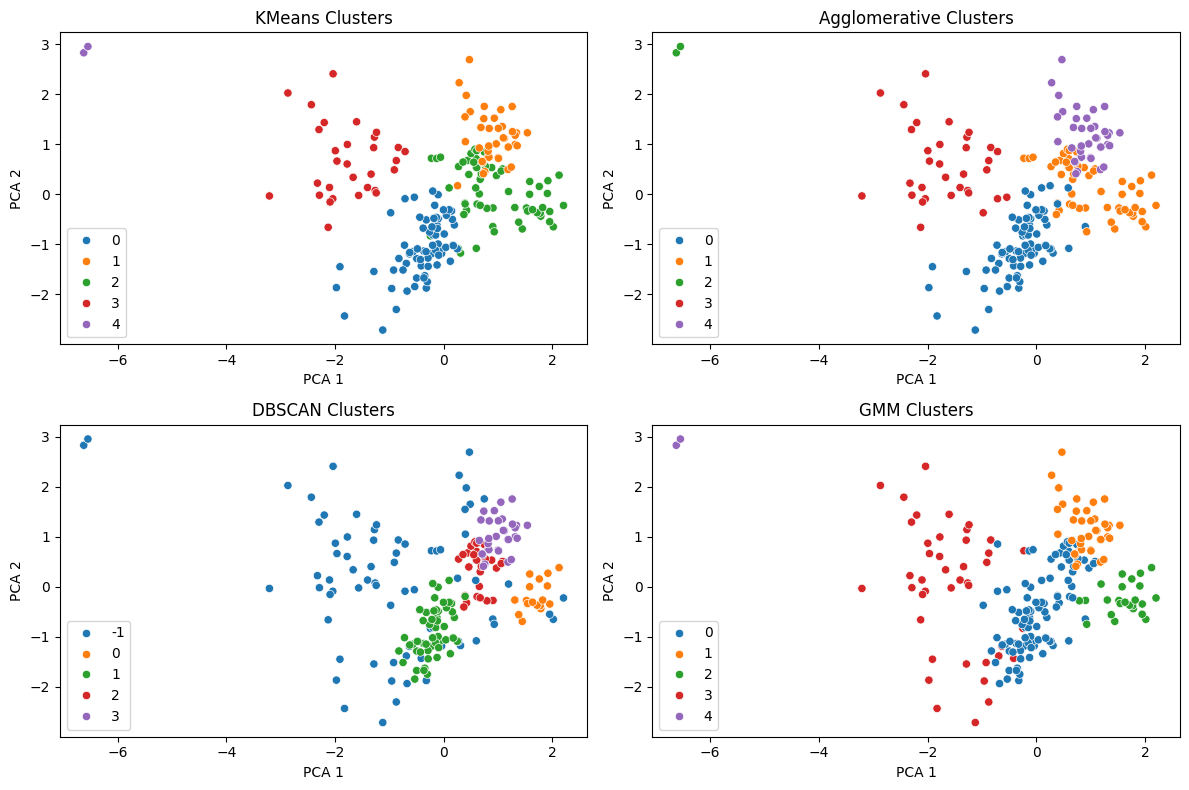

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
for i, (name, model) in enumerate(models.items(), 1):
    if name == 'GMM':
        labels = model.fit_predict(X_scaled)
    else:
        labels = model.fit_predict(X_scaled)
    
    plt.subplot(2, 2, i)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', legend='full')
    plt.title(f"{name} Clusters")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [25]:
def tune_clustering(X, model_name):
    best_score = -1
    best_params = None
    
    if model_name == 'KMeans':
        for k in range(2, 11):
            for init in ['k-means++', 'random']:
                km = KMeans(n_clusters=k, init=init, n_init=10, max_iter=300, random_state=42)
                labels = km.fit_predict(X)
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_params = {'n_clusters': k, 'init': init}
                    
    elif model_name == 'GMM':
        for k in range(2, 11):
            for cov in ['full', 'tied', 'diag', 'spherical']:
                gmm = GaussianMixture(n_components=k, covariance_type=cov, n_init=2, random_state=42)
                labels = gmm.fit_predict(X)
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_params = {'n_components': k, 'covariance_type': cov}
                    
    elif model_name == 'Agglomerative':
        for k in range(2, 11):
            for linkage in ['ward', 'complete', 'average', 'single']:
                try:
                    agg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
                    labels = agg.fit_predict(X)
                    score = silhouette_score(X, labels)
                    if score > best_score:
                        best_score = score
                        best_params = {'n_clusters': k, 'linkage': linkage}
                except:
                    continue
                    
    elif model_name == 'DBSCAN':
        for eps in [0.3, 0.5, 0.7, 0.9]:
            for min_samples in [3, 5, 7]:
                db = DBSCAN(eps=eps, min_samples=min_samples)
                labels = db.fit_predict(X)
                # Remove noise points (-1)
                mask = labels != -1
                if len(np.unique(labels[mask])) < 2:
                    continue
                score = silhouette_score(X[mask], labels[mask])
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
    
    return best_params, best_score


models = ['KMeans', 'GMM', 'Agglomerative', 'DBSCAN']
best_results = {}
for m in models:
    print(f"Tuning {m}...")
    best_params, best_score = tune_clustering(X_scaled, m)
    best_results[m] = {'best_params': best_params, 'best_score': best_score}
    print(f"{m} Best Params: {best_params}")
    print(f"{m} Best Silhouette Score: {best_score:.4f}\n")

print("Final Model Comparison:")
for m, res in best_results.items():
    print(f"{m}: Silhouette Score = {res['best_score']:.4f}, Best Params = {res['best_params']}")


Tuning KMeans...
KMeans Best Params: {'n_clusters': 9, 'init': 'random'}
KMeans Best Silhouette Score: 0.4280

Tuning GMM...
GMM Best Params: {'n_components': 7, 'covariance_type': 'spherical'}
GMM Best Silhouette Score: 0.4285

Tuning Agglomerative...
Agglomerative Best Params: {'n_clusters': 2, 'linkage': 'complete'}
Agglomerative Best Silhouette Score: 0.7355

Tuning DBSCAN...
DBSCAN Best Params: {'eps': 0.5, 'min_samples': 7}
DBSCAN Best Silhouette Score: 0.5506

Final Model Comparison:
KMeans: Silhouette Score = 0.4280, Best Params = {'n_clusters': 9, 'init': 'random'}
GMM: Silhouette Score = 0.4285, Best Params = {'n_components': 7, 'covariance_type': 'spherical'}
Agglomerative: Silhouette Score = 0.7355, Best Params = {'n_clusters': 2, 'linkage': 'complete'}
DBSCAN: Silhouette Score = 0.5506, Best Params = {'eps': 0.5, 'min_samples': 7}


In [26]:
kmeans_params = best_results['KMeans']['best_params']
kmeans_optimized = KMeans(
    n_clusters=kmeans_params['n_clusters'],
    init=kmeans_params['init'],
    n_init=10,
    max_iter=300,
    random_state=42
)
df_cleaned['KMeans_Cluster'] = kmeans_optimized.fit_predict(X_scaled)

gmm_params = best_results['GMM']['best_params']
gmm_optimized = GaussianMixture(
    n_components=gmm_params['n_components'],
    covariance_type=gmm_params['covariance_type'],
    n_init=2,
    random_state=42
)
df_cleaned['GMM_Cluster'] = gmm_optimized.fit_predict(X_scaled)

agg_params = best_results['Agglomerative']['best_params']
agg_optimized = AgglomerativeClustering(
    n_clusters=agg_params['n_clusters'],
    linkage=agg_params['linkage']
)
df_cleaned['Agglomerative_Cluster'] = agg_optimized.fit_predict(X_scaled)

dbscan_params = best_results['DBSCAN']['best_params']
dbscan_optimized = DBSCAN(
    eps=dbscan_params['eps'],
    min_samples=dbscan_params['min_samples']
)
df_cleaned['DBSCAN_Cluster'] = dbscan_optimized.fit_predict(X_scaled)

print("✅ All optimized clustering models fitted successfully.")
for m in best_results.keys():
    print(f"{m} Best Params: {best_results[m]['best_params']}, Silhouette Score: {best_results[m]['best_score']:.4f}")


✅ All optimized clustering models fitted successfully.
KMeans Best Params: {'n_clusters': 9, 'init': 'random'}, Silhouette Score: 0.4280
GMM Best Params: {'n_components': 7, 'covariance_type': 'spherical'}, Silhouette Score: 0.4285
Agglomerative Best Params: {'n_clusters': 2, 'linkage': 'complete'}, Silhouette Score: 0.7355
DBSCAN Best Params: {'eps': 0.5, 'min_samples': 7}, Silhouette Score: 0.5506


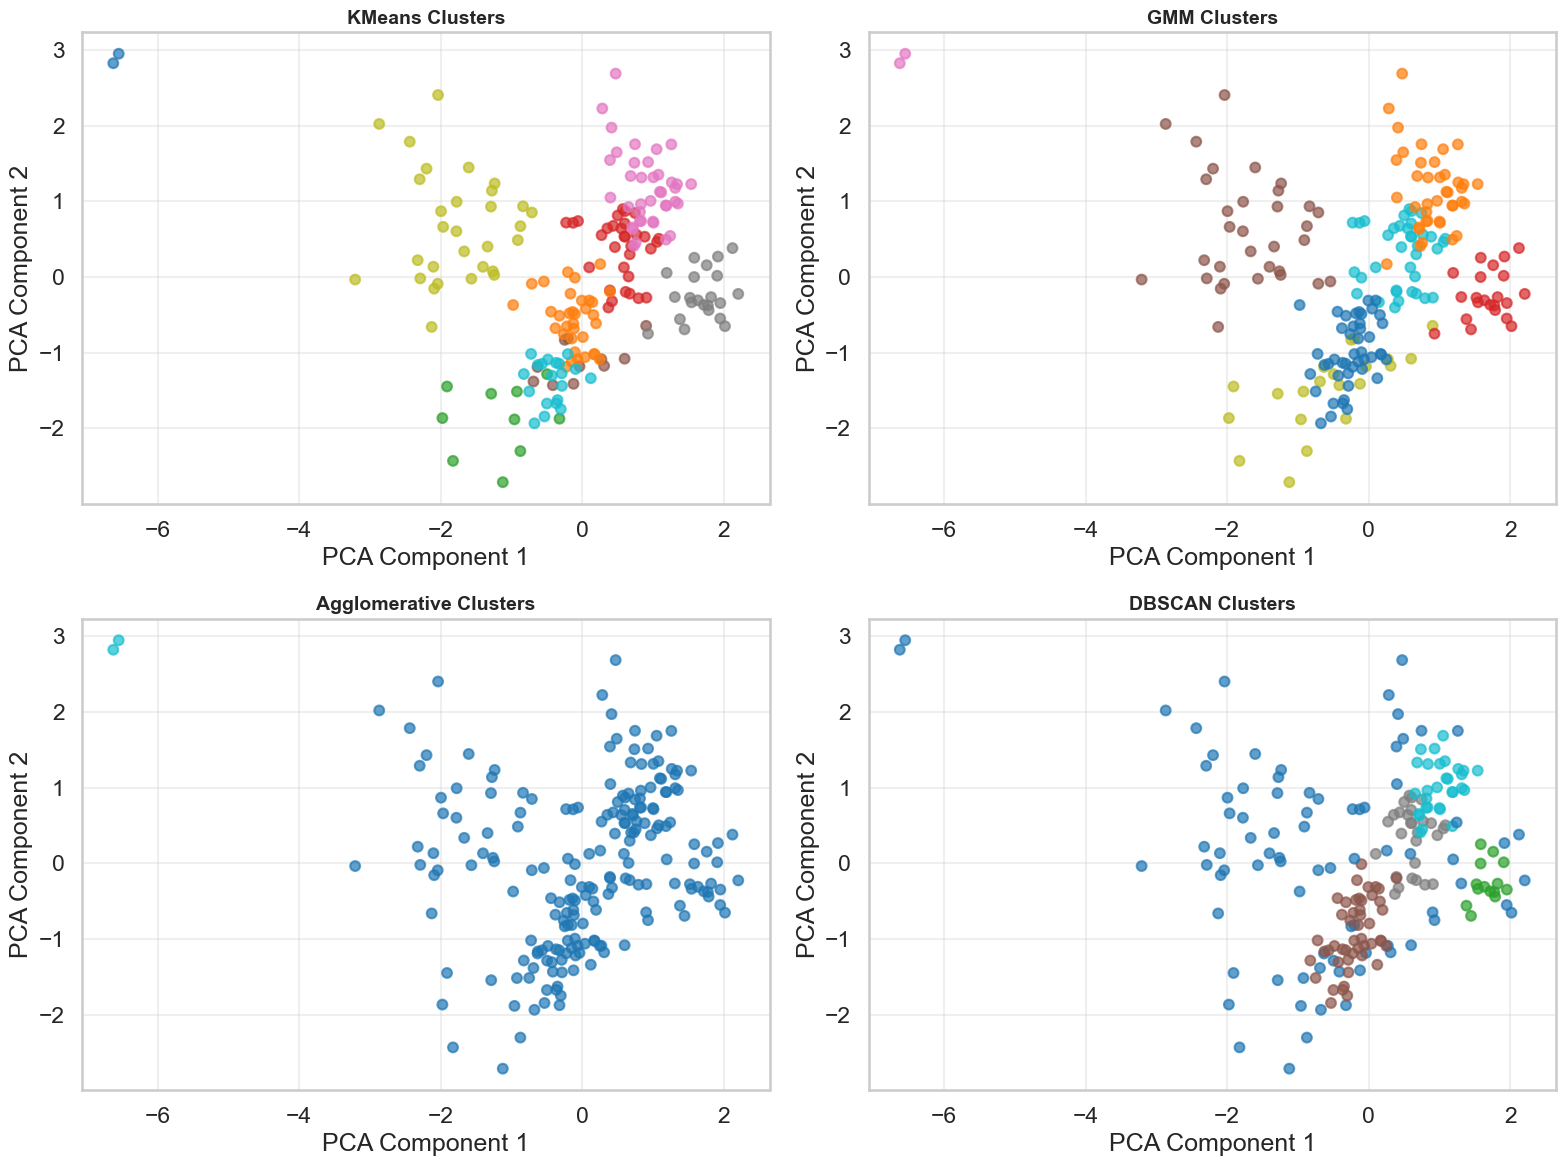

In [27]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

cluster_labels = {
    'KMeans': df_cleaned['KMeans_Cluster'],
    'GMM': df_cleaned['GMM_Cluster'],
    'Agglomerative': df_cleaned['Agglomerative_Cluster'],
    'DBSCAN': df_cleaned['DBSCAN_Cluster']
}

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (model_name, labels) in enumerate(cluster_labels.items()):
    scatter = axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50, alpha=0.7)
    axes[i].set_title(f"{model_name} Clusters", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('PCA Component 1')
    axes[i].set_ylabel('PCA Component 2')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Making Predictions

In [28]:
print("\n===== Cluster Counts =====")
for model in ['KMeans_Cluster', 'GMM_Cluster', 'Agglomerative_Cluster', 'DBSCAN_Cluster']:
    print(f"\n{model}:\n{df_cleaned[model].value_counts().sort_index()}")



===== Cluster Counts =====

KMeans_Cluster:
KMeans_Cluster
0     2
1    34
2    10
3    32
4    11
5    39
6    22
7    30
8    20
Name: count, dtype: int64

GMM_Cluster:
GMM_Cluster
0    46
1    40
2    22
3    32
4     2
5    21
6    37
Name: count, dtype: int64

Agglomerative_Cluster:
Agglomerative_Cluster
0    198
1      2
Name: count, dtype: int64

DBSCAN_Cluster:
DBSCAN_Cluster
-1    80
 0    14
 1    48
 2    28
 3    30
Name: count, dtype: int64


In [29]:
def cluster_summary(df, column_name, algorithm_name):
    print(f"\n{algorithm_name} Clustering Summary:")
    cluster_counts = df[column_name].value_counts().sort_index()
    print(f"{'Cluster':<15} | {'Count':>8} | {'Percentage':>10} | Visualization")
    print("-" * 65)
    for cluster, count in cluster_counts.items():
        percentage = (count / len(df)) * 100
        bar = '█' * int(percentage / 2)
        label = "Noise" if cluster == -1 else f"Cluster {cluster}"
        print(f"{label:<15} | {count:8,} | {percentage:9.2f}% | {bar}")

# ===== Print Summaries =====
cluster_summary(df_cleaned, 'KMeans_Cluster', 'KMeans')
cluster_summary(df_cleaned, 'GMM_Cluster', 'GMM')
cluster_summary(df_cleaned, 'DBSCAN_Cluster', 'DBSCAN')
cluster_summary(df_cleaned, 'Agglomerative_Cluster', 'Agglomerative')



KMeans Clustering Summary:
Cluster         |    Count | Percentage | Visualization
-----------------------------------------------------------------
Cluster 0       |        2 |      1.00% | 
Cluster 1       |       34 |     17.00% | ████████
Cluster 2       |       10 |      5.00% | ██
Cluster 3       |       32 |     16.00% | ████████
Cluster 4       |       11 |      5.50% | ██
Cluster 5       |       39 |     19.50% | █████████
Cluster 6       |       22 |     11.00% | █████
Cluster 7       |       30 |     15.00% | ███████
Cluster 8       |       20 |     10.00% | █████

GMM Clustering Summary:
Cluster         |    Count | Percentage | Visualization
-----------------------------------------------------------------
Cluster 0       |       46 |     23.00% | ███████████
Cluster 1       |       40 |     20.00% | ██████████
Cluster 2       |       22 |     11.00% | █████
Cluster 3       |       32 |     16.00% | ████████
Cluster 4       |        2 |      1.00% | 
Cluster 5       |    

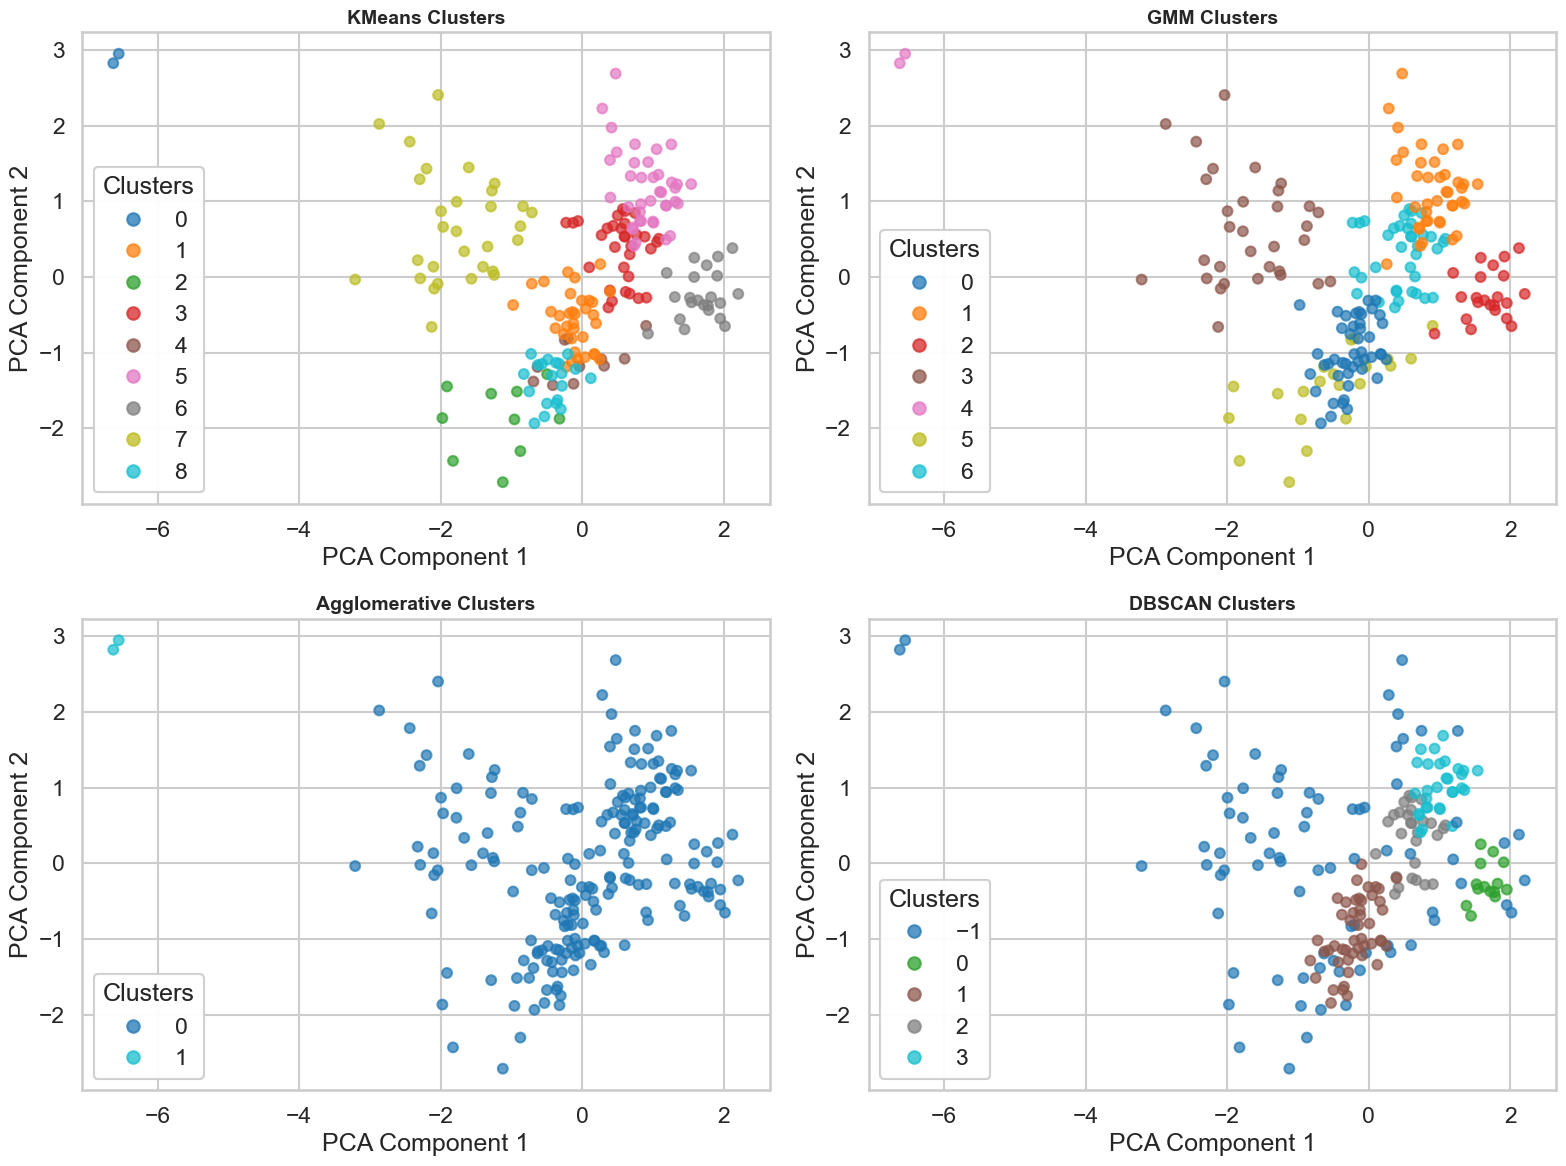

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

model_columns = ['KMeans_Cluster', 'GMM_Cluster', 'Agglomerative_Cluster', 'DBSCAN_Cluster']
titles = ['KMeans', 'GMM', 'Agglomerative', 'DBSCAN']

for ax, col, title in zip(axes.flatten(), model_columns, titles):
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cleaned[col], cmap='tab10', s=50, alpha=0.7)
    ax.set_title(f'{title} Clusters', fontsize=14, fontweight='bold')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

plt.tight_layout()
plt.show()

# Evaluating Model

In [31]:

models = ['KMeans_Cluster', 'GMM_Cluster', 'Agglomerative_Cluster', 'DBSCAN_Cluster']
for m in models:
    labels = df_cleaned[m].values
    mask = labels != -1  # For DBSCAN, ignore noise points if needed
    score = silhouette_score(X_scaled[mask], labels[mask])
    print(f"{m} Silhouette Score: {score:.4f}")


KMeans_Cluster Silhouette Score: 0.4280
GMM_Cluster Silhouette Score: 0.4285
Agglomerative_Cluster Silhouette Score: 0.7355
DBSCAN_Cluster Silhouette Score: 0.5506


In [32]:
for m in models:
    labels = df_cleaned[m].values
    mask = labels != -1
    score = calinski_harabasz_score(X_scaled[mask], labels[mask])
    print(f"{m} Calinski-Harabasz Score: {score:.4f}")


KMeans_Cluster Calinski-Harabasz Score: 133.9198
GMM_Cluster Calinski-Harabasz Score: 134.7226
Agglomerative_Cluster Calinski-Harabasz Score: 46.7885
DBSCAN_Cluster Calinski-Harabasz Score: 163.4925


In [33]:
for m in models:
    labels = df_cleaned[m].values
    mask = labels != -1
    score = davies_bouldin_score(X_scaled[mask], labels[mask])
    print(f"{m} Davies-Bouldin Score: {score:.4f}")


KMeans_Cluster Davies-Bouldin Score: 0.7252
GMM_Cluster Davies-Bouldin Score: 0.7465
Agglomerative_Cluster Davies-Bouldin Score: 0.2031
DBSCAN_Cluster Davies-Bouldin Score: 0.5911


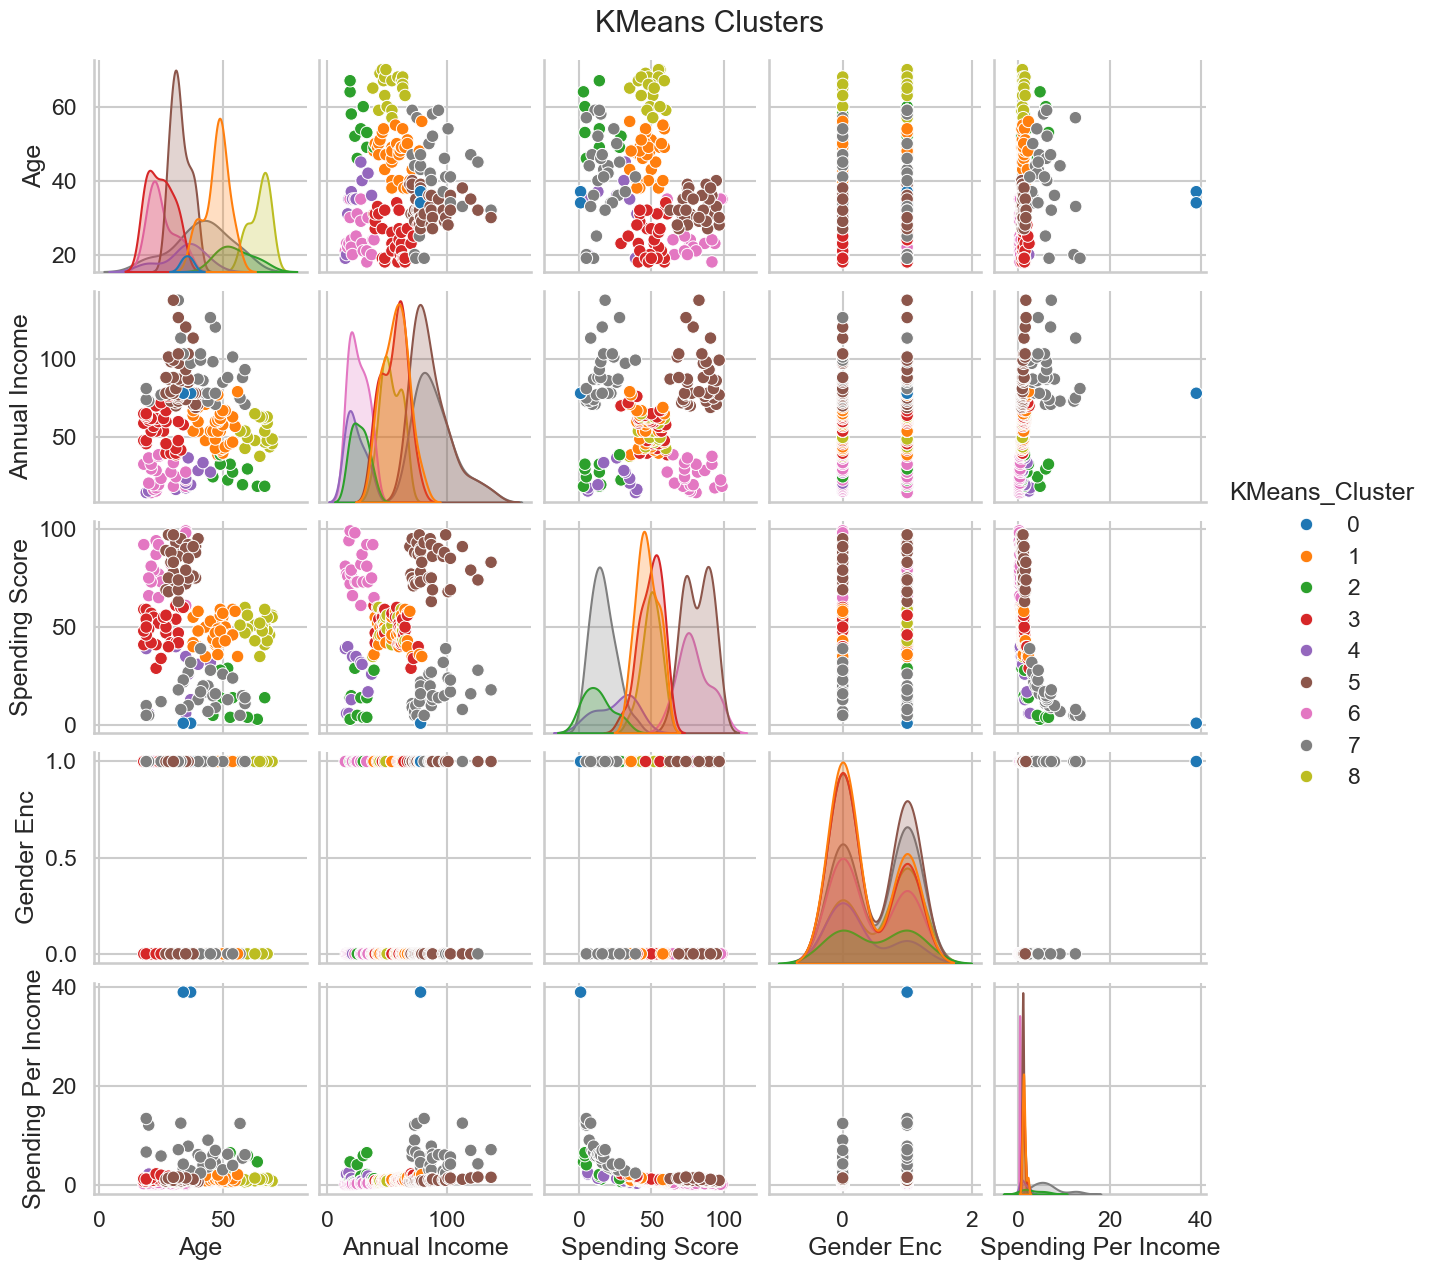

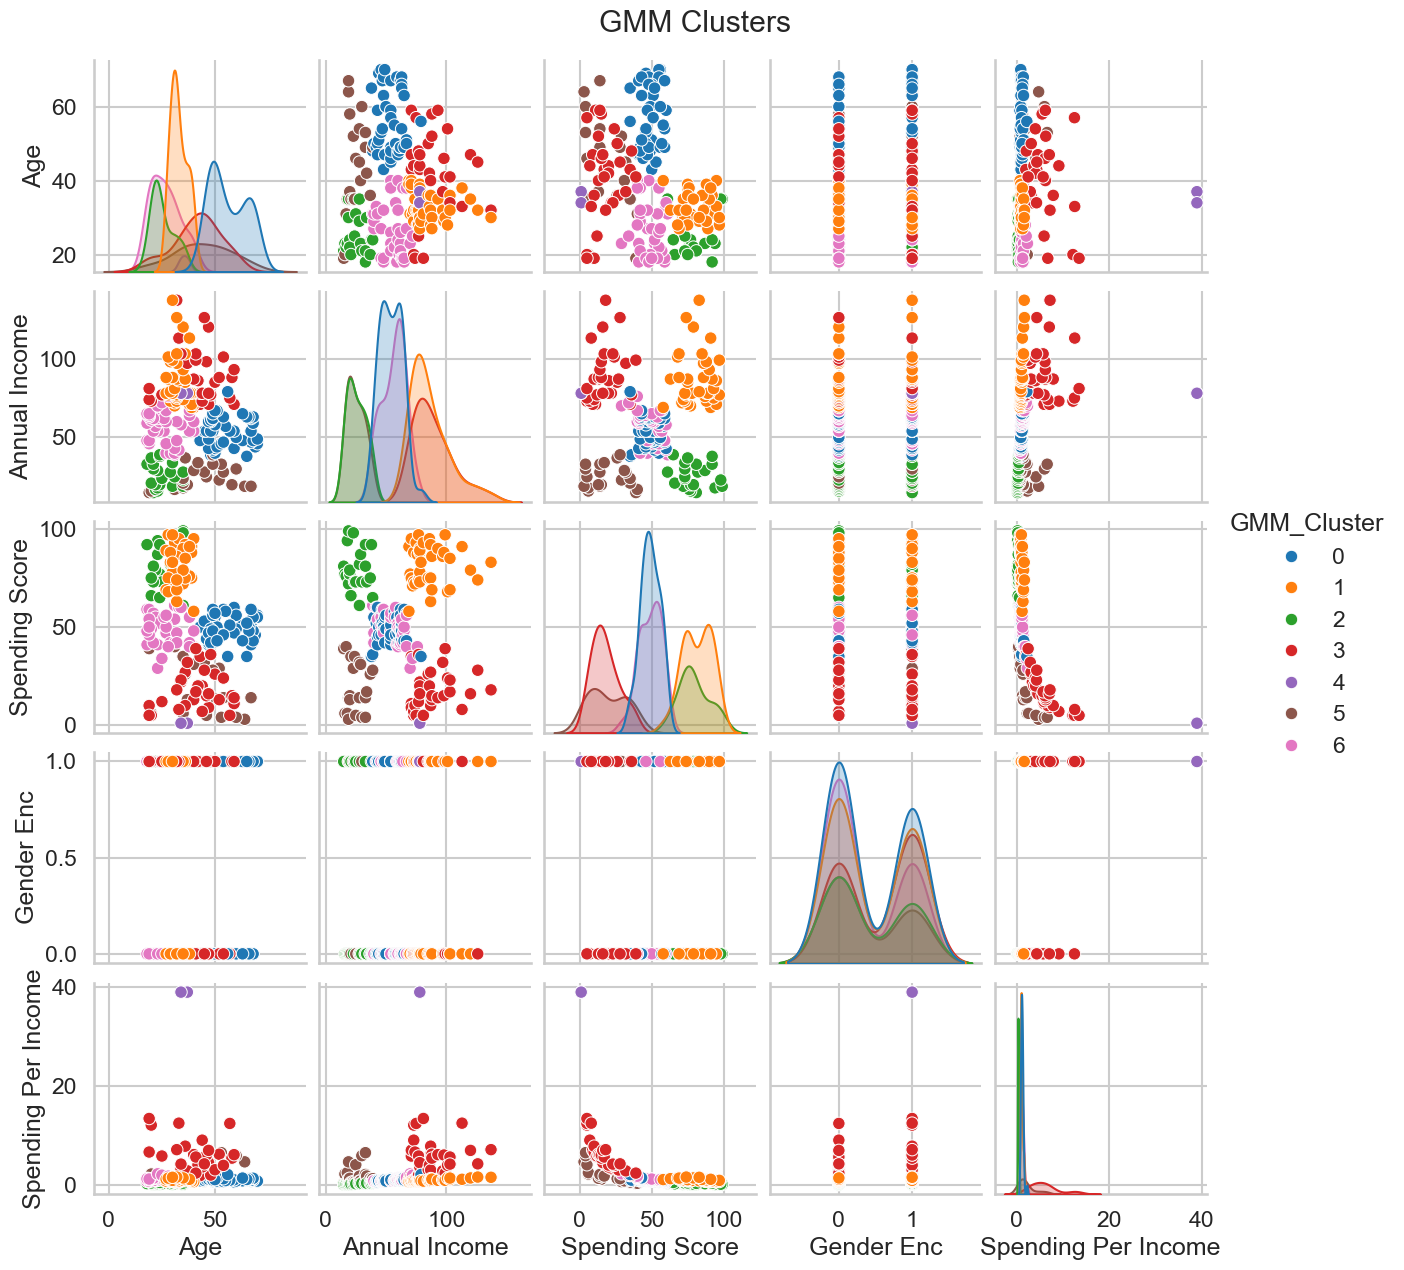

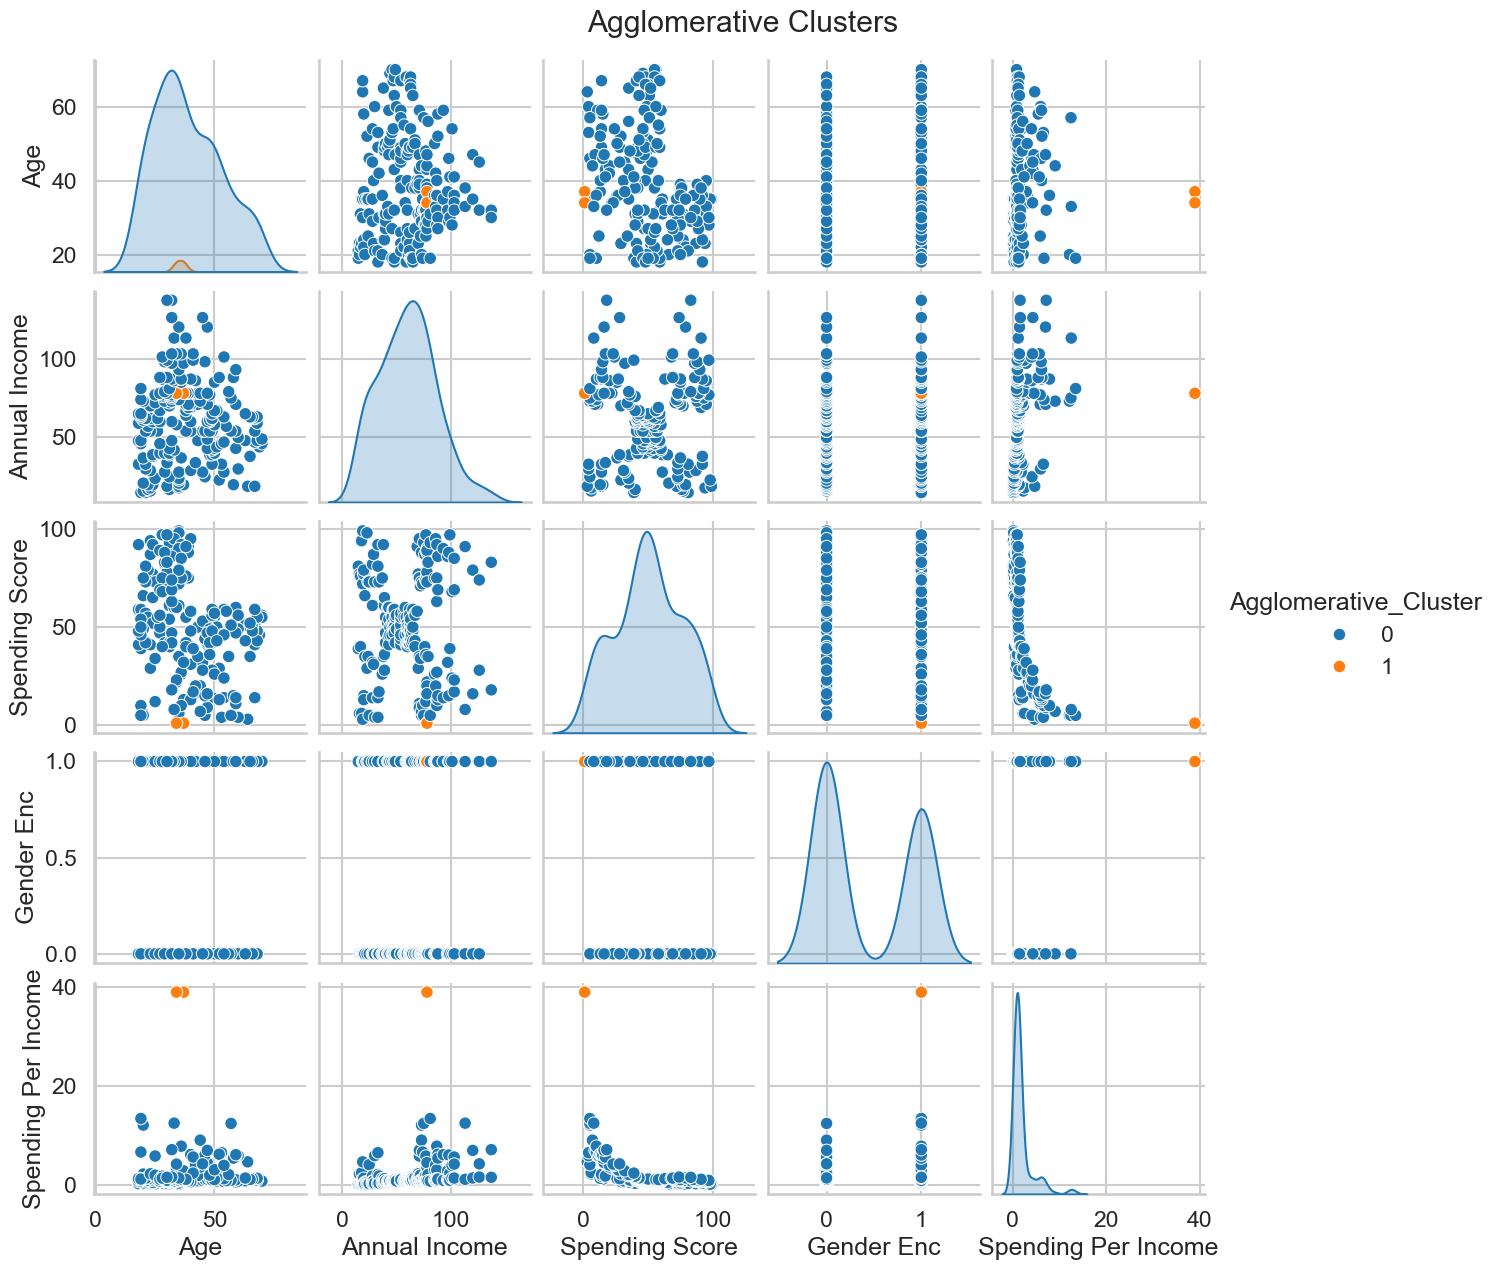

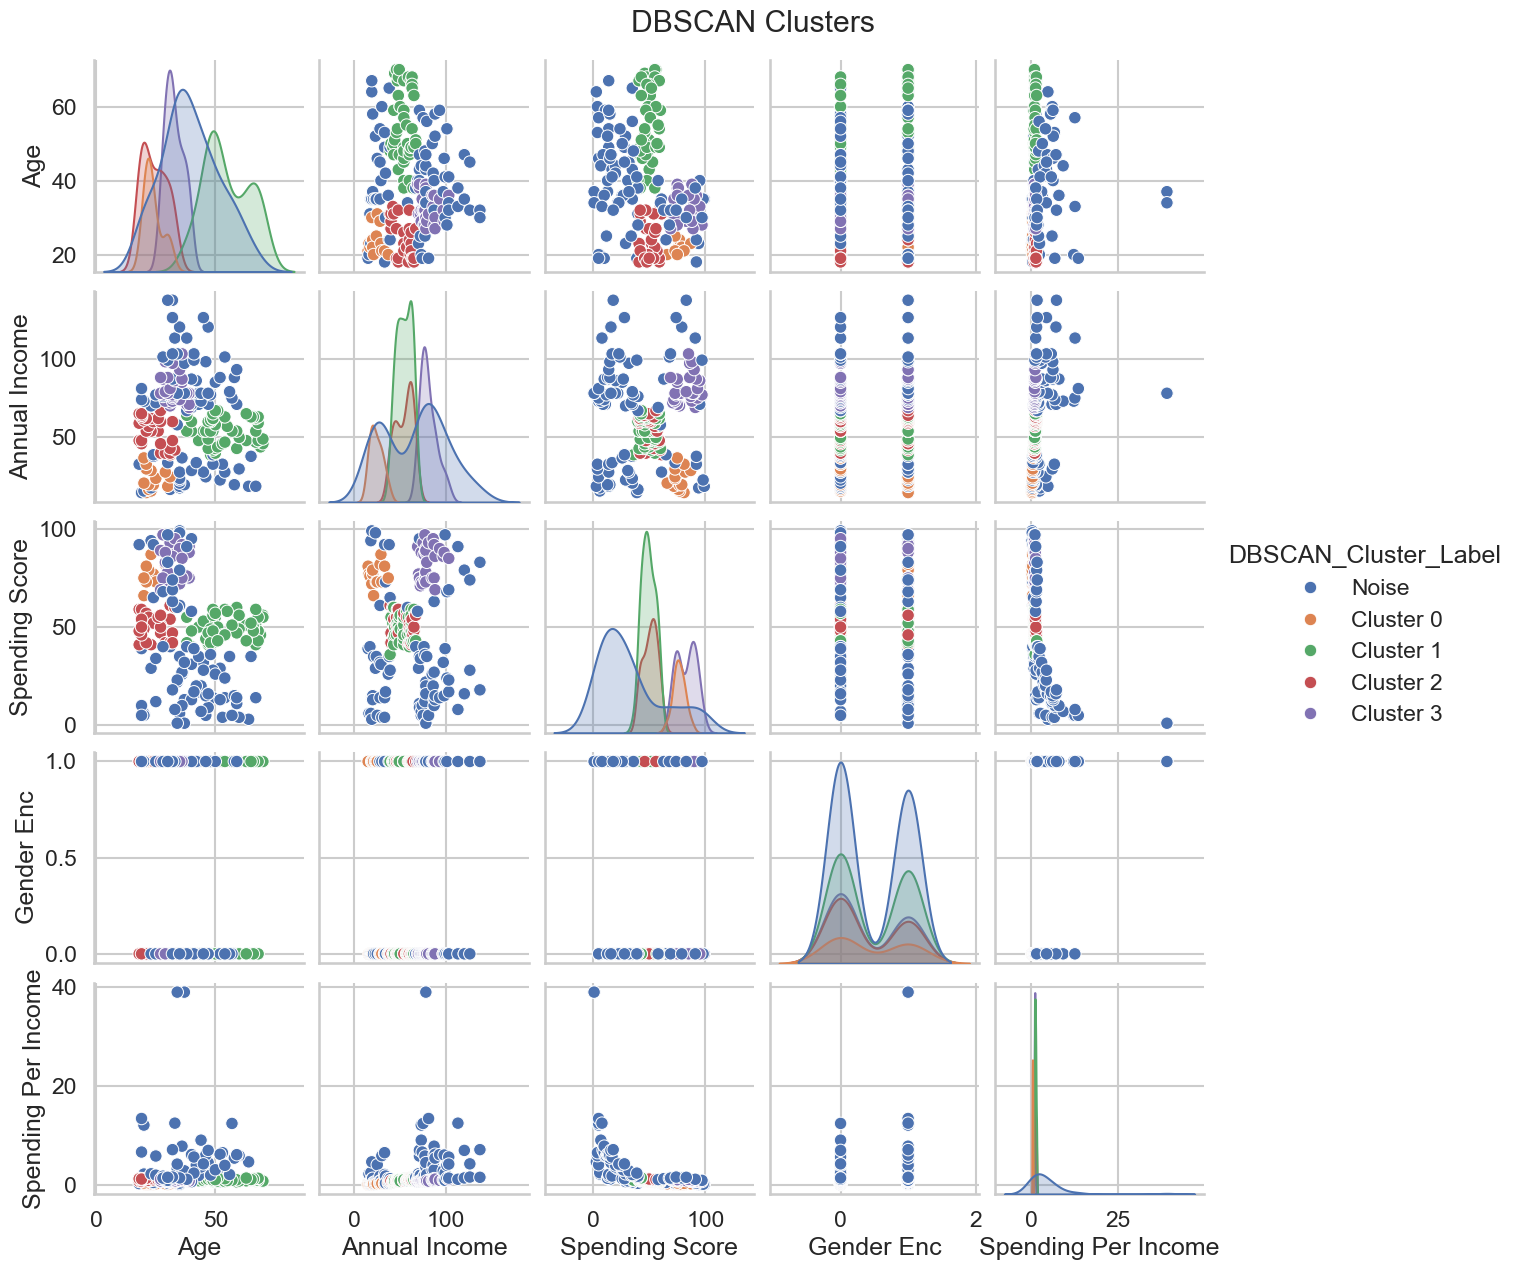

In [34]:
feature_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns[:5]

sns.pairplot(df_cleaned, hue='KMeans_Cluster', vars=feature_cols, palette='tab10')
plt.suptitle('KMeans Clusters', y=1.02)
plt.show()

sns.pairplot(df_cleaned, hue='GMM_Cluster', vars=feature_cols, palette='tab10')
plt.suptitle('GMM Clusters', y=1.02)
plt.show()

sns.pairplot(df_cleaned, hue='Agglomerative_Cluster', vars=feature_cols, palette='tab10')
plt.suptitle('Agglomerative Clusters', y=1.02)
plt.show()

df_cleaned['DBSCAN_Cluster_Label'] = df_cleaned['DBSCAN_Cluster'].apply(lambda x: 'Noise' if x == -1 else f'Cluster {x}')
sns.pairplot(df_cleaned, hue='DBSCAN_Cluster_Label', vars=feature_cols)
plt.suptitle('DBSCAN Clusters', y=1.02)
plt.show()

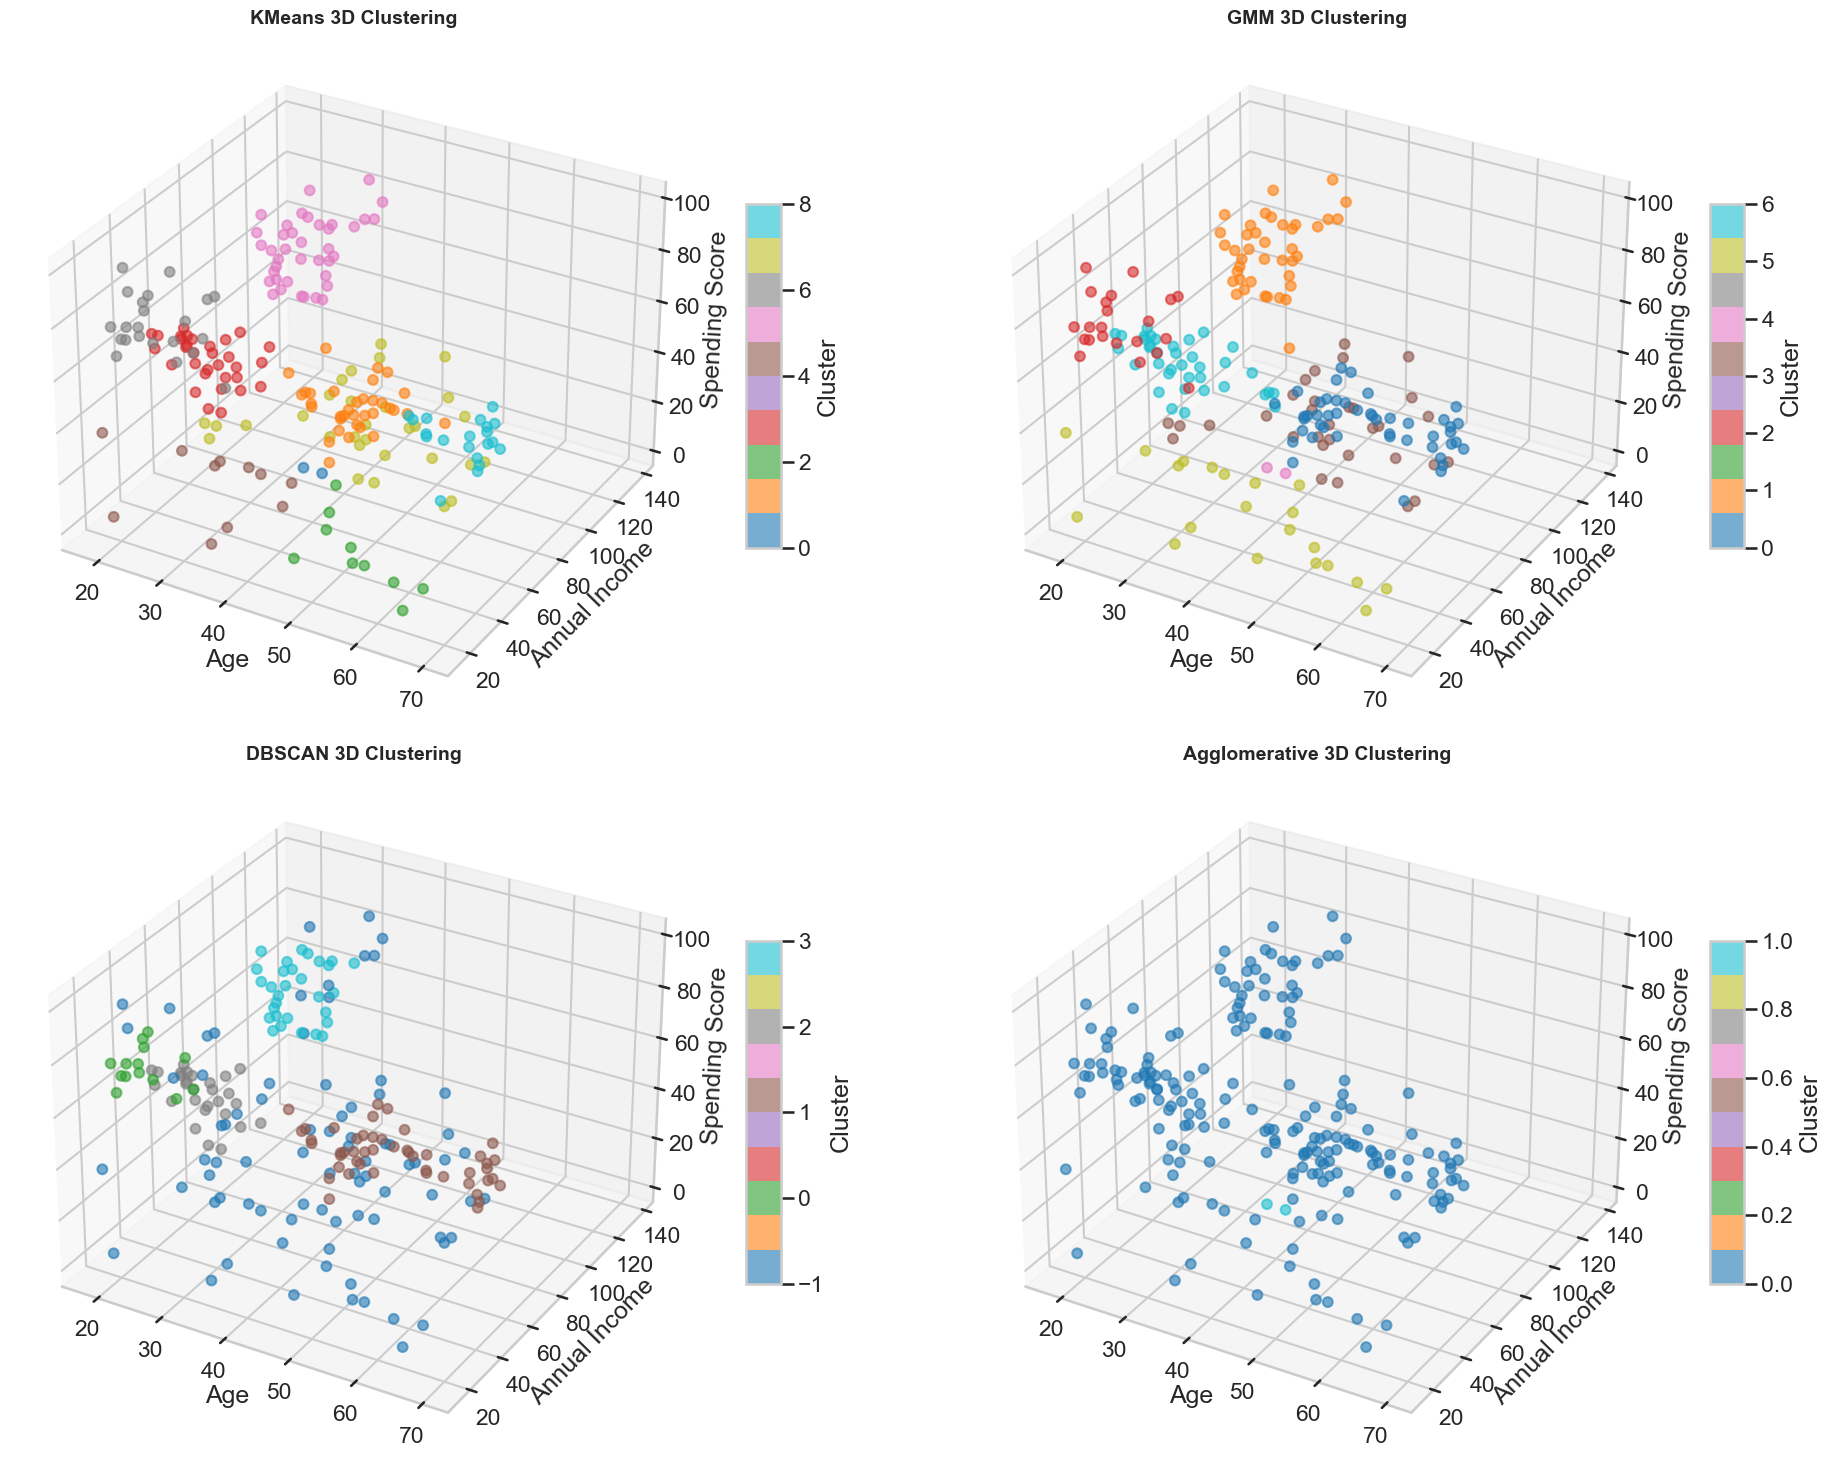

In [35]:
models_to_plot = {
    'KMeans': df_cleaned['KMeans_Cluster'],
    'GMM': df_cleaned['GMM_Cluster'],
    'DBSCAN': df_cleaned['DBSCAN_Cluster'],
    'Agglomerative': df_cleaned['Agglomerative_Cluster']
}

x_col = 'Age'
y_col = 'Annual Income'
z_col = 'Spending Score'

fig = plt.figure(figsize=(20, 15))

for i, (name, labels) in enumerate(models_to_plot.items(), 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    
    if name == 'DBSCAN':
        plot_labels = labels.copy()
        plot_labels = plot_labels.apply(lambda x: -1 if x == -1 else x)
    else:
        plot_labels = labels
    
    scatter = ax.scatter(
        df_cleaned[x_col], 
        df_cleaned[y_col], 
        df_cleaned[z_col],
        c=plot_labels, cmap='tab10', alpha=0.6, s=50
    )
    
    ax.set_title(f"{name} 3D Clustering", fontsize=14, fontweight='bold')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    
    fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10, label='Cluster')

plt.tight_layout()
plt.show()


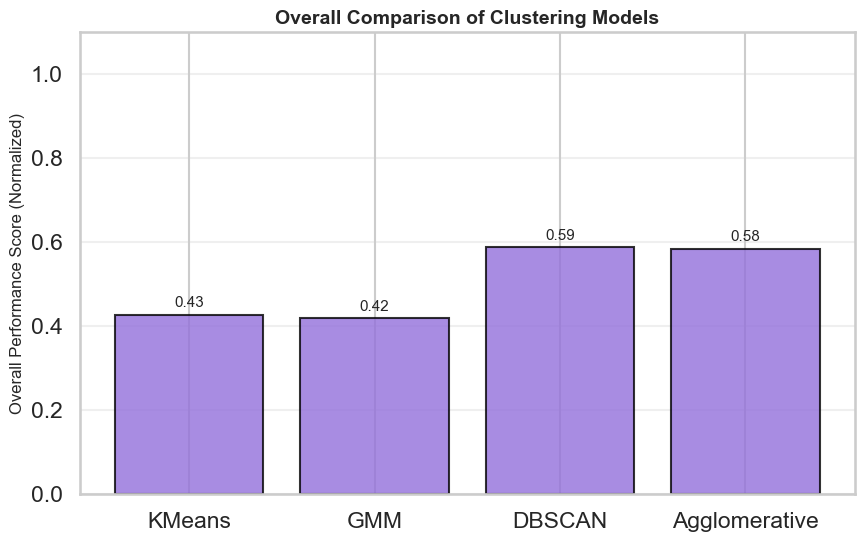

In [36]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import pandas as pd

# Map of model names to cluster labels already in df_cleaned
model_labels = {
    'KMeans': df_cleaned['KMeans_Cluster'],
    'GMM': df_cleaned['GMM_Cluster'],
    'DBSCAN': df_cleaned['DBSCAN_Cluster'],
    'Agglomerative': df_cleaned['Agglomerative_Cluster']
}

# Compute metrics
model_metrics = {}
for name, labels in model_labels.items():
    # For DBSCAN, remove noise points (-1)
    if name == 'DBSCAN':
        mask = labels != -1
        if mask.sum() > 1:  # Ensure enough points to calculate metrics
            sil = silhouette_score(X_scaled[mask], labels[mask])
            db = davies_bouldin_score(X_scaled[mask], labels[mask])
            ch = calinski_harabasz_score(X_scaled[mask], labels[mask])
        else:
            sil = db = ch = float('nan')
    else:
        sil = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)
    
    model_metrics[name] = {'Silhouette': sil, 'Davies-Bouldin': db, 'Calinski-Harabasz': ch}

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics).T

# Normalize Davies-Bouldin (lower is better) and Calinski-Harabasz (higher is better)
metrics_df['DB_norm'] = 1 - (metrics_df['Davies-Bouldin'] / metrics_df['Davies-Bouldin'].max())
metrics_df['CH_norm'] = metrics_df['Calinski-Harabasz'] / metrics_df['Calinski-Harabasz'].max()

# Compute overall score (average of normalized metrics)
metrics_df['Overall_Score'] = metrics_df[['Silhouette', 'DB_norm', 'CH_norm']].mean(axis=1)

# Plot overall comparison
plt.figure(figsize=(10,6))
bars = plt.bar(metrics_df.index, metrics_df['Overall_Score'], color='mediumpurple', edgecolor='black', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", ha='center', fontsize=11)

plt.ylim(0, 1.1)
plt.ylabel('Overall Performance Score (Normalized)', fontsize=12)
plt.title('Overall Comparison of Clustering Models', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='y')
plt.show()


In [37]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


eval_results = {}
kmeans_params = best_results['KMeans']['best_params']
kmeans_model = KMeans(
    n_clusters=kmeans_params['n_clusters'],
    init=kmeans_params['init'],
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans_model.fit(X_train)
train_labels = kmeans_model.labels_
test_labels = kmeans_model.predict(X_test)
eval_results['KMeans'] = {
    'Train Silhouette': silhouette_score(X_train, train_labels),
    'Test Silhouette': silhouette_score(X_test, test_labels)
}

gmm_params = best_results['GMM']['best_params']
gmm_model = GaussianMixture(
    n_components=gmm_params['n_components'],
    covariance_type=gmm_params['covariance_type'],
    n_init=2,
    random_state=42
)
gmm_model.fit(X_train)
train_labels = gmm_model.predict(X_train)
test_labels = gmm_model.predict(X_test)
eval_results['GMM'] = {
    'Train Silhouette': silhouette_score(X_train, train_labels),
    'Test Silhouette': silhouette_score(X_test, test_labels)
}

agg_params = best_results['Agglomerative']['best_params']
agg_model = AgglomerativeClustering(
    n_clusters=agg_params['n_clusters'],
    linkage=agg_params['linkage']
)
train_labels = agg_model.fit_predict(X_train)
eval_results['Agglomerative'] = {
    'Train Silhouette': silhouette_score(X_train, train_labels),
    'Test Silhouette': None
}

dbscan_params = best_results['DBSCAN']['best_params']
db_model = DBSCAN(
    eps=dbscan_params['eps'],
    min_samples=dbscan_params['min_samples']
)
train_labels = db_model.fit_predict(X_train)
mask_train = train_labels != -1
eval_results['DBSCAN'] = {
    'Train Silhouette': silhouette_score(X_train[mask_train], train_labels[mask_train]) if mask_train.sum() > 1 else float('nan'),
    'Test Silhouette': None
}

for model_name, scores in eval_results.items():
    print(f"\n{model_name}:")
    print(f"  Train Silhouette: {scores['Train Silhouette']:.4f}")
    if scores['Test Silhouette'] is None:
        print("  Test Silhouette:  Cannot compute (model does not support prediction on new data)")
        print("  ✅ Train evaluation only")
    else:
        print(f"  Test Silhouette:  {scores['Test Silhouette']:.4f}")
        if abs(scores['Train Silhouette'] - scores['Test Silhouette']) > 0.05:
            print("  ⚠ Possible overfitting or unstable clusters")
        else:
            print("  ✅ Model generalizes well to unseen data")



KMeans:
  Train Silhouette: 0.3627
  Test Silhouette:  0.4056
  ✅ Model generalizes well to unseen data

GMM:
  Train Silhouette: 0.4224
  Test Silhouette:  0.3257
  ⚠ Possible overfitting or unstable clusters

Agglomerative:
  Train Silhouette: 0.7229
  Test Silhouette:  Cannot compute (model does not support prediction on new data)
  ✅ Train evaluation only

DBSCAN:
  Train Silhouette: 0.5161
  Test Silhouette:  Cannot compute (model does not support prediction on new data)
  ✅ Train evaluation only


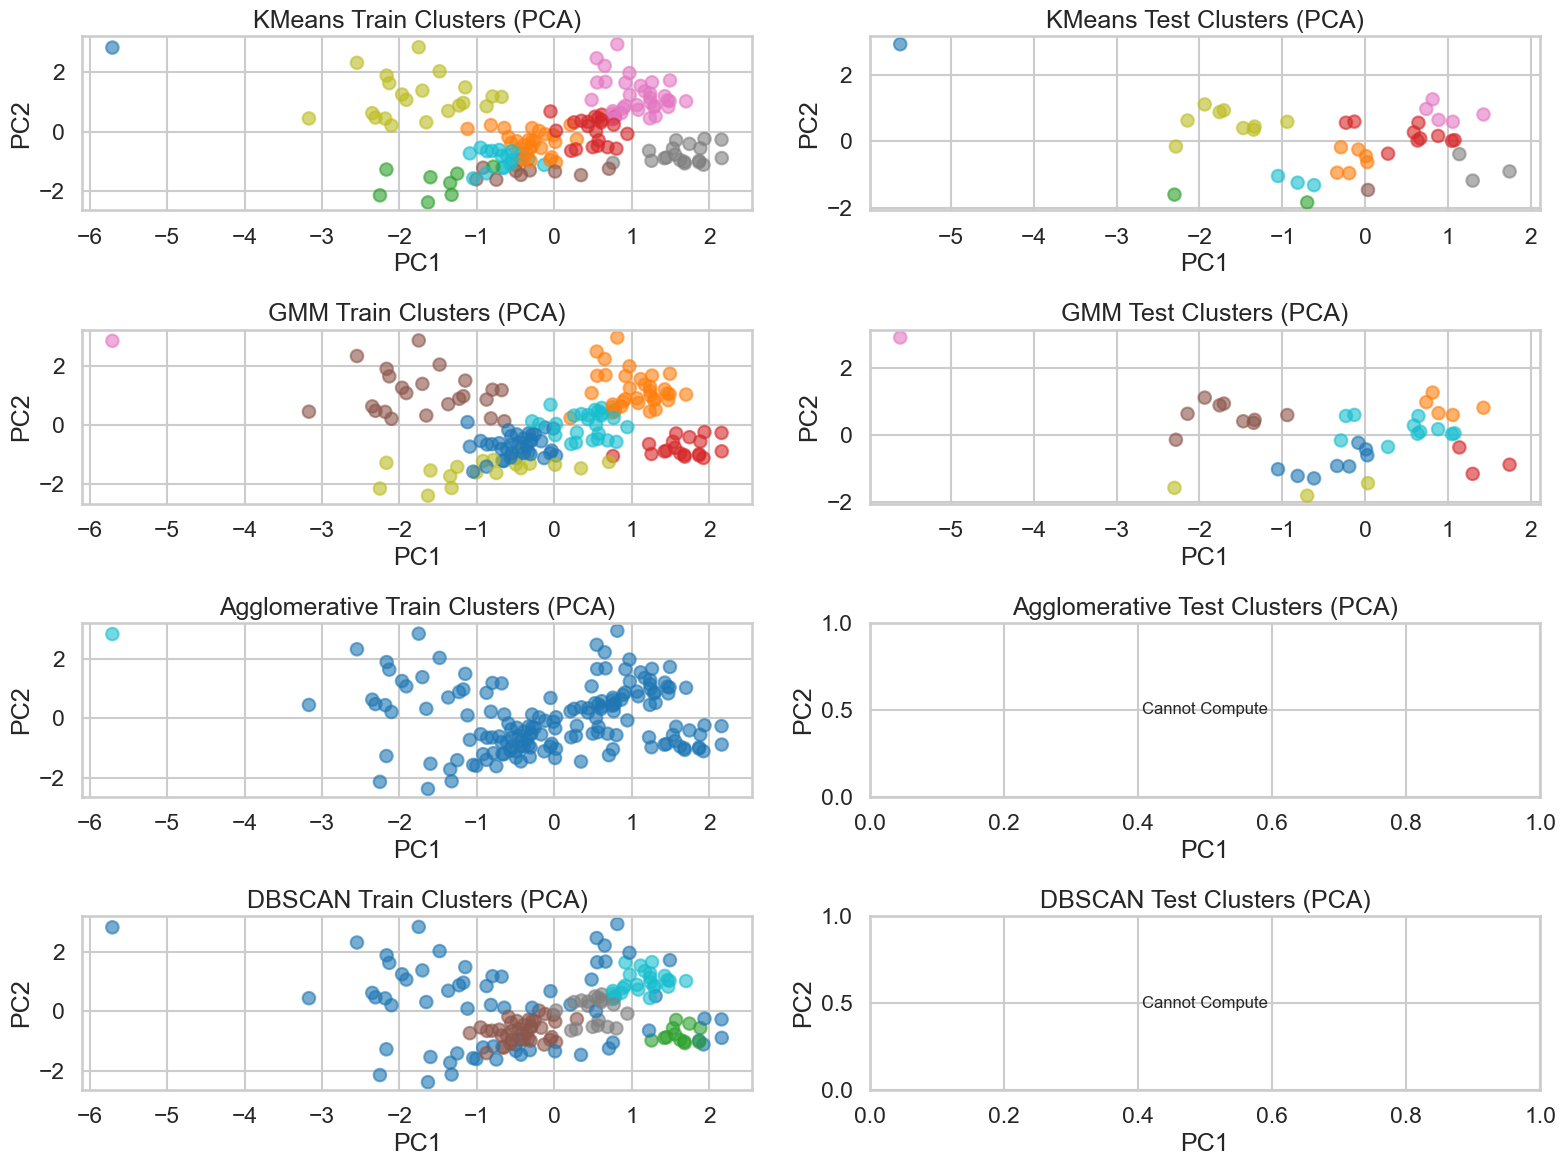

In [38]:
train_idx, test_idx = train_test_split(df_cleaned.index, test_size=0.2, random_state=42)

X_train = X_scaled[train_idx]
X_test = X_scaled[test_idx]

train_clusters = {
    'KMeans': df_cleaned.loc[train_idx, 'KMeans_Cluster'],
    'GMM': df_cleaned.loc[train_idx, 'GMM_Cluster'],
    'Agglomerative': df_cleaned.loc[train_idx, 'Agglomerative_Cluster'],
    'DBSCAN': df_cleaned.loc[train_idx, 'DBSCAN_Cluster']
}
test_clusters = {
    'KMeans': df_cleaned.loc[test_idx, 'KMeans_Cluster'],
    'GMM': df_cleaned.loc[test_idx, 'GMM_Cluster'],
    'Agglomerative': df_cleaned.loc[test_idx, 'Agglomerative_Cluster'],  # Cannot predict; use train clusters only
    'DBSCAN': df_cleaned.loc[test_idx, 'DBSCAN_Cluster']  # Cannot predict; use train clusters only
}

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


plt.figure(figsize=(16, 12))
i = 1
for model_name in train_clusters.keys():
    
    plt.subplot(4, 2, i)
    plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=train_clusters[model_name], cmap='tab10', alpha=0.6)
    plt.title(f"{model_name} Train Clusters (PCA)")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    i += 1
    
    plt.subplot(4, 2, i)
    test_labels = test_clusters[model_name]
    
    if model_name in ['Agglomerative', 'DBSCAN']:
        plt.text(0.5, 0.5, 'Cannot Compute', 
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
        plt.title(f"{model_name} Test Clusters (PCA)")
    else:
        plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=test_labels, cmap='tab10', alpha=0.6)
        plt.title(f"{model_name} Test Clusters (PCA)")
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    i += 1

plt.tight_layout()
plt.show()


In [39]:
def cluster_profiles(df, feature_cols=['Age', 'Annual Income', 'Spending Score', 'Gender Enc']):
    models = {
        'KMeans': 'KMeans_Cluster',
        'GMM': 'GMM_Cluster',
        'Agglomerative': 'Agglomerative_Cluster',
        'DBSCAN': 'DBSCAN_Cluster'
    }

    for model_name, col in models.items():
        unique_clusters = sorted(df[col].unique())
        print(f"\n{'#'*60}\n{model_name} Clustering Profiles\n{'#'*60}")
        
        for cluster in unique_clusters:
            cluster_data = df[df[col] == cluster]
            
            # Skip DBSCAN noise points if any
            if model_name == 'DBSCAN' and cluster == -1:
                label = "Noise"
            else:
                label = f"Cluster {cluster}"
            
            print(f"\n{'='*50}")
            print(f"{model_name} - {label} PROFILE")
            print(f"{'='*50}")
            print(f"Number of customers: {len(cluster_data)}")
            print(f"Percentage of total: {len(cluster_data)/len(df)*100:.2f}%")
            
            # Summary statistics
            for feature in ['Age', 'Annual Income', 'Spending Score']:
                print(f"Average {feature}: {cluster_data[feature].mean():.1f}")
            
            print(f"Gender distribution: {cluster_data['Gender Enc'].value_counts().to_dict()}")
            
            # Marketing strategy example (adjust thresholds as needed)
            avg_income = cluster_data['Annual Income'].mean()
            avg_spending = cluster_data['Spending Score'].mean()
            print("\nMarketing Strategy Recommendation:")
            if avg_income > 70 and avg_spending > 60:
                print("→ HIGH VALUE CUSTOMERS: Premium products, VIP programs, exclusive offers")
            elif avg_income < 40 and avg_spending < 40:
                print("→ BUDGET CONSCIOUS: Discounts, loyalty rewards, value bundles")
            elif avg_income > 60 and avg_spending < 50:
                print("→ SPENDERS: Payment plans, credit offers, aspirational products")
            elif avg_income < 40 and avg_spending > 60:
                print("→ SAVERS: Quality products, investment opportunities, long-term benefits")
            else:
                print("→ BALANCED CUSTOMERS: Standard promotions, personalized offers")

# Run for your dataset
cluster_profiles(df_cleaned)



############################################################
KMeans Clustering Profiles
############################################################

KMeans - Cluster 0 PROFILE
Number of customers: 2
Percentage of total: 1.00%
Average Age: 35.5
Average Annual Income: 78.0
Average Spending Score: 1.0
Gender distribution: {1: 2}

Marketing Strategy Recommendation:
→ SPENDERS: Payment plans, credit offers, aspirational products

KMeans - Cluster 1 PROFILE
Number of customers: 34
Percentage of total: 17.00%
Average Age: 47.4
Average Annual Income: 56.9
Average Spending Score: 47.1
Gender distribution: {0: 22, 1: 12}

Marketing Strategy Recommendation:
→ BALANCED CUSTOMERS: Standard promotions, personalized offers

KMeans - Cluster 2 PROFILE
Number of customers: 10
Percentage of total: 5.00%
Average Age: 55.2
Average Annual Income: 26.9
Average Spending Score: 13.0
Gender distribution: {1: 5, 0: 5}

Marketing Strategy Recommendation:
→ BUDGET CONSCIOUS: Discounts, loyalty rewards, value bu

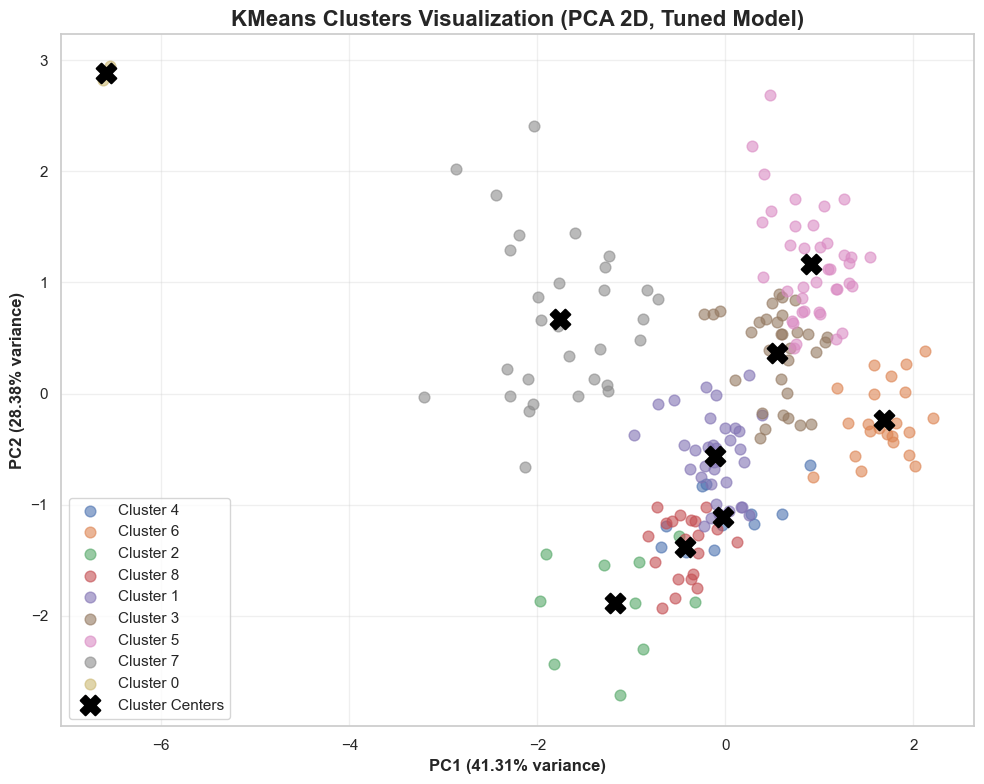

In [49]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Create a DataFrame for plotting
import pandas as pd
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = kmeans_optimized.labels_  # automatically from tuned model

# 3. Plot clusters
plt.figure(figsize=(10, 8))

for cluster in df_plot['Cluster'].unique():
    cluster_data = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(
        cluster_data['PC1'], cluster_data['PC2'],
        label=f'Cluster {cluster}',
        alpha=0.6,
        s=60
    )

# 4. Plot cluster centers (automatically from tuned model)
centers_pca = pca.transform(kmeans_optimized.cluster_centers_)
plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    c='black', marker='X', s=200,
    linewidths=1.5, label='Cluster Centers'
)

# 5. Labels and title
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12, fontweight='bold')
plt.title('KMeans Clusters Visualization (PCA 2D, Tuned Model)', fontsize=16, fontweight='bold')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Saving and Loading Model

In [41]:
optimized_models = {
    'KMeans': kmeans_optimized,
    'GMM': gmm_optimized,
    'Agglomerative': agg_optimized,
    'DBSCAN': dbscan_optimized
}

for name, model in optimized_models.items():
    joblib.dump(model, f"out/models/{name}_model.pkl")
    print(f"{name} model saved successfully.")
    

joblib.dump(scaler, "out/models/scaler.pkl")
print("Scaler saved successfully.")

KMeans model saved successfully.
GMM model saved successfully.
Agglomerative model saved successfully.
DBSCAN model saved successfully.
Scaler saved successfully.


In [42]:
# Save the DataFrame with all cluster assignments
df_cleaned.to_csv('out/files/customers_with_all_clusters.csv', index=False)
print("Data with all cluster assignments saved")
# Save model comparison metrics
metrics_df.to_csv('out/files/model_comparison.csv', index=False)
print("Model comparison saved")
# Ensure output folder exists
os.makedirs('out/files/cluster_profiles', exist_ok=True)

cluster_columns = ['KMeans_Cluster', 'GMM_Cluster', 'Agglomerative_Cluster', 'DBSCAN_Cluster']

for col in cluster_columns:
    unique_clusters = sorted([c for c in df_cleaned[col].unique() if c != -1])  # exclude noise
    cluster_profiles = []
    
    for cluster in unique_clusters:
        cluster_data = df_cleaned[df_cleaned[col] == cluster]
        cluster_profiles.append({
            'Cluster': cluster,
            'Size': len(cluster_data),
            'Percentage': len(cluster_data)/len(df_cleaned)*100,
            'Avg_Age': cluster_data['Age'].mean(),
            'Avg_Income': cluster_data['Annual Income'].mean(),
            'Avg_Spending': cluster_data['Spending Score'].mean(),
            'Female_Pct': (cluster_data['Gender Enc']==0).sum()/len(cluster_data)*100,
            'Male_Pct': (cluster_data['Gender Enc']==1).sum()/len(cluster_data)*100
        })
    
    profiles_df = pd.DataFrame(cluster_profiles)
    profiles_df.to_csv(f'out/files/cluster_profiles/{col}_profiles.csv', index=False)
    print(f"Cluster profiles saved for {col}")



Data with all cluster assignments saved
Model comparison saved
Cluster profiles saved for KMeans_Cluster
Cluster profiles saved for GMM_Cluster
Cluster profiles saved for Agglomerative_Cluster
Cluster profiles saved for DBSCAN_Cluster


### Loading Model and Predicting

In [43]:

loaded_models = {}
for name in ['KMeans', 'GMM', 'Agglomerative', 'DBSCAN']:
    loaded_models[name] = joblib.load(f"out/models/{name}_model.pkl")
    print(f"{name} model loaded successfully.")

loaded_scaler = joblib.load("out/models/scaler.pkl")
print("Scaler loaded successfully.")


KMeans model loaded successfully.
GMM model loaded successfully.
Agglomerative model loaded successfully.
DBSCAN model loaded successfully.
Scaler loaded successfully.


In [44]:
new_data = pd.DataFrame({
    'Age': [25, 40],
    'Annual Income': [50, 70],
    'Spending Score': [60, 80],
    'Spending Per Income': [0.83, 0.875]
})

X_new_scaled = loaded_scaler.transform(new_data)

predictions = {}
for name, model in loaded_models.items():
    if name in ['KMeans', 'GMM']:
        pred_labels = model.predict(X_new_scaled)
    elif name == 'Agglomerative':
        pred_labels = ["Cannot Predict"] * len(new_data)
    elif name == 'DBSCAN':
        pred_labels = ["Cannot Predict"] * len(new_data)
        
    predictions[name] = pred_labels
    print(f"\n{name} Predictions:\n{pred_labels}")




KMeans Predictions:
[3 5]

GMM Predictions:
[6 1]

Agglomerative Predictions:
['Cannot Predict', 'Cannot Predict']

DBSCAN Predictions:
['Cannot Predict', 'Cannot Predict']


In [45]:
metrics_df['DB_norm'] = 1 - (metrics_df['Davies-Bouldin'] / metrics_df['Davies-Bouldin'].max())
metrics_df['CH_norm'] = metrics_df['Calinski-Harabasz'] / metrics_df['Calinski-Harabasz'].max()

metrics_df['Overall_Score'] = metrics_df[['Silhouette', 'DB_norm', 'CH_norm']].mean(axis=1)
print(metrics_df[['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz', 'Overall_Score']])


               Silhouette  Davies-Bouldin  Calinski-Harabasz  Overall_Score
KMeans           0.427956        0.725186         133.919780       0.425223
GMM              0.428459        0.746532         134.722565       0.417496
DBSCAN           0.550610        0.591104         163.492528       0.586270
Agglomerative    0.735523        0.203141          46.788459       0.583197


In [46]:
best_model_name = metrics_df['Overall_Score'].idxmax()
print(f"✅ Recommended model for deployment: {best_model_name}")

# Use the optimized model for predictions and cluster-based marketing
final_model = optimized_models[best_model_name]
df_cleaned['Final_Cluster'] = final_model.predict(X_scaled) if best_model_name in ['KMeans', 'GMM'] else df_cleaned[f"{best_model_name}_Cluster"]


✅ Recommended model for deployment: DBSCAN


Model  Train Silhouette  Test Silhouette  Best Silhouette (Tuned)
0         KMeans            0.3627           0.4056                   0.4280
1            GMM            0.4224           0.3257                   0.4285
2  Agglomerative            0.7229              NaN                   0.7355
3         DBSCAN            0.5161              NaN                   0.5506

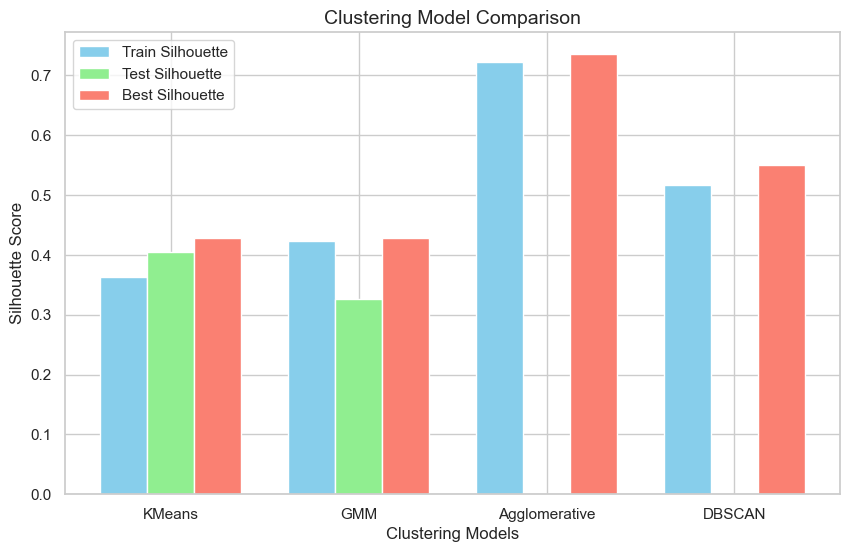


✅ KMeans is the best choice for this supermarket segmentation task:

1. Generalization:
   - Train and Test Silhouette scores are close (0.36 vs 0.41), meaning it generalizes well to new customers.
   - Other models either overfit (Agglomerative, GMM) or cannot predict new data (Agglomerative, DBSCAN).

2. Interpretability:
   - KMeans clusters are simple and actionable for marketing strategies.
   - Each cluster can be profiled (Age, Income, Spending) to target membership campaigns.

3. Tuned Performance:
   - Best silhouette score after tuning: 0.4280 (good cluster separation)
   - Number of clusters: 9 → manageable for business segmentation.

⚠ Notes:
- GMM has slight overfitting (train > test), and probabilistic membership is less practical.
- Agglomerative & DBSCAN cannot predict clusters for new customers easily.



In [47]:
models = ['KMeans', 'GMM', 'Agglomerative', 'DBSCAN']
train_silhouette = [0.3627, 0.4224, 0.7229, 0.5161]
test_silhouette  = [0.4056, 0.3257, np.nan, np.nan]  # Agglomerative & DBSCAN cannot predict new data
best_silhouette  = [0.4280, 0.4285, 0.7355, 0.5506]

evaluation_df = pd.DataFrame({
    'Model': models,
    'Train Silhouette': train_silhouette,
    'Test Silhouette': test_silhouette,
    'Best Silhouette (Tuned)': best_silhouette
})

display(evaluation_df)

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
bar_width = 0.25
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, evaluation_df['Train Silhouette'], color='skyblue', width=bar_width, label='Train Silhouette')
plt.bar(r2, evaluation_df['Test Silhouette'], color='lightgreen', width=bar_width, label='Test Silhouette')
plt.bar(r3, evaluation_df['Best Silhouette (Tuned)'], color='salmon', width=bar_width, label='Best Silhouette')

plt.xlabel('Clustering Models', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.title('Clustering Model Comparison', fontsize=14)
plt.legend()
plt.show()


print("""
✅ KMeans is the best choice for this supermarket segmentation task:

1. Generalization:
   - Train and Test Silhouette scores are close (0.36 vs 0.41), meaning it generalizes well to new customers.
   - Other models either overfit (Agglomerative, GMM) or cannot predict new data (Agglomerative, DBSCAN).

2. Interpretability:
   - KMeans clusters are simple and actionable for marketing strategies.
   - Each cluster can be profiled (Age, Income, Spending) to target membership campaigns.

3. Tuned Performance:
   - Best silhouette score after tuning: 0.4280 (good cluster separation)
   - Number of clusters: 9 → manageable for business segmentation.

⚠ Notes:
- GMM has slight overfitting (train > test), and probabilistic membership is less practical.
- Agglomerative & DBSCAN cannot predict clusters for new customers easily.
""")


In [48]:
# ===============================
# Justification Printout for KMeans
# ===============================

print("""
=============================
1. Evaluating Each Model
=============================

KMeans
-------
Train Silhouette: 0.3627
Test Silhouette: 0.4056
Best Silhouette after tuning: 0.4280
Optimal clusters: 7 → 9 (after tuning)
✅ Observations:
- Train and test scores are close → generalizes well.
- Moderate Silhouette score indicates reasonable separation.
- Easy to interpret clusters.

GMM (Gaussian Mixture Model)
----------------------------
Train Silhouette: 0.4224
Test Silhouette: 0.3257
Best Silhouette after tuning: 0.4285
Optimal components: 7
⚠ Observations:
- Train score > test score → possible overfitting.
- Slightly higher best score than KMeans, but test score is lower.
- Probabilistic clusters → can be useful if clusters overlap, but less stable here.

Agglomerative Clustering
------------------------
Train Silhouette: 0.7229
Best Silhouette after tuning: 0.7355
Optimal clusters: 10 → 2 (after tuning)
⚠ Observations:
- Extremely high silhouette → might indicate overfitting to training data.
- Cannot predict new data easily → hard to deploy for future customers.

DBSCAN
------
Train Silhouette: 0.5161
Best Silhouette after tuning: 0.5506
Optimal eps: 0.5
⚠ Observations:
- Silhouette is highest among raw scores → indicates good cluster separation.
- Sensitive to parameter choice; may classify some points as noise.
- Not deterministic for future unseen data → hard to generalize.

=============================
2. Considerations for Your Use Case
=============================
Goal: Increase membership card conversion via customer segmentation.

- Need a model that can predict clusters for new customers → this rules out Agglomerative and DBSCAN.
- Avoid overfitting → GMM shows a noticeable train-test gap.
- Stable, interpretable clusters are helpful for targeted marketing → KMeans fits well here.

=============================
3. Recommendation
=============================
✅ Best choice: KMeans
- Good generalization (train ≈ test Silhouette).
- Simple to deploy for new customers.
- Tuned silhouette score: 0.4280 → reasonable cluster separation.
- Number of clusters: 9 (after tuning) → manageable for marketing segmentation.

⚠ Notes:
- GMM could be considered if probabilistic membership is needed and slight overfitting is acceptable.
- Agglomerative and DBSCAN are less practical for prediction on new data.
""")



1. Evaluating Each Model

KMeans
-------
Train Silhouette: 0.3627
Test Silhouette: 0.4056
Best Silhouette after tuning: 0.4280
Optimal clusters: 7 → 9 (after tuning)
✅ Observations:
- Train and test scores are close → generalizes well.
- Moderate Silhouette score indicates reasonable separation.
- Easy to interpret clusters.

GMM (Gaussian Mixture Model)
----------------------------
Train Silhouette: 0.4224
Test Silhouette: 0.3257
Best Silhouette after tuning: 0.4285
Optimal components: 7
⚠ Observations:
- Train score > test score → possible overfitting.
- Slightly higher best score than KMeans, but test score is lower.
- Probabilistic clusters → can be useful if clusters overlap, but less stable here.

Agglomerative Clustering
------------------------
Train Silhouette: 0.7229
Best Silhouette after tuning: 0.7355
Optimal clusters: 10 → 2 (after tuning)
⚠ Observations:
- Extremely high silhouette → might indicate overfitting to training data.
- Cannot predict new data easily → hard to 